# Installing Libraries

In [1]:
!pip install torchmetrics scikit-learn medpy
!pip install monai
# !pip install segmentation-models-pytorch
!pip install pretrained-backbones-unet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.3/156.3 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.5/963.5 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00


In [2]:
!pip uninstall timm
!pip install timm

Found existing installation: timm 0.6.12
Uninstalling timm-0.6.12:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/timm-0.6.12.dist-info/*
    /usr/local/lib/python3.11/dist-packages/timm/*
Proceed (Y/n)? Y
  Successfully uninstalled timm-0.6.12
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 52.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pretrained-backbones-unet 0.0.1 requires timm==0.6.12, but you have timm 1.0.16 which is incompatible.


In [3]:
!pip install fvcore

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61397 sha256=39d8c1dfc7ea16583afa1a55335cbdfb6486d771081f4b27ae4834fb2262a2f8
  Stored in directory: /root/.cache/pip/wheels/65/71/95/3b8fde5c65c6e4a806e0867c1651dcc71a1cb2f3430e8f355f
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31527 sha256=8ee676be27ffc6f5826004ca7339332fee9a8337310c04b899da587546ced3c1
  Stored in directory: /root/.cache/pip/wheels/ba/5e/16/6117f8fe7e9c0c161a795e10d94645ebcf301ccbd01f66d8ec
Successfully built fvcore iopath


In [4]:
!pip show pretrained-backbones-unet

Name: pretrained-backbones-unet
Version: 0.0.1
Summary: A small example package
Home-page: https://github.com/mberkay0/pretrained-backbones-unet
Author: Berkay Mayali
Author-email: Example Author <author@example.com>
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: timm, torch
Required-by: 


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Our imports

In [6]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import numpy as np
import torchvision.transforms.functional as F
from tqdm import tqdm  # for progress bars
from backbones_unet.model.unet import Unet
# import segmentation_models_pytorch as smp
from torchvision.transforms import InterpolationMode
import random
import matplotlib.pyplot as plt
#cudnn module from PyTorch, which provides access to NVIDIA's CUDA Deep Neural Network library (cuDNN). cuDNN is a library of highly optimized primitives for deep learning.
import torch.backends.cudnn as cudnn
import backbones_unet
from torch.amp import autocast, GradScaler  # Import from torch.amp
from tabulate import tabulate
import time  # Import time module

#Setting Up Reproducibility and CUDA Environment

In [7]:
# Set seed for reproducibility
SEED = 42
#This line sets the seed for Python's built-in random module.
random.seed(SEED)
#This line sets the seed for NumPy's random number generator.
np.random.seed(SEED)
#This line sets the seed for PyTorch's random number generator for the CPU.
torch.manual_seed(SEED)
if torch.cuda.is_available():
#sets the seed for PyTorch's random number generator for all available GPUs.
    torch.cuda.manual_seed_all(SEED)

os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

 # Defines essential parameters for your model training , specifies the locations of your data, determines the size of your datasets, and sets up a location to save your trained model.

In [8]:
########################################
# Network and Training Parameters      #
########################################
IMG_SIZE = 256
NBEPOCHS = 30
BATCH_SIZE = 64
NBPATIENCE_EPOCHS = 200
NUM_CLASSES = 4 # Assuming 3 classes as confirmed

train_images_path = "/content/drive/MyDrive/✨ GP ✨/CAMUS_PNG/dataset/train/images"
train_masks_path = "/content/drive/MyDrive/✨ GP ✨/CAMUS_PNG/dataset/train/labels"
valid_images_path = "/content/drive/MyDrive/✨ GP ✨/CAMUS_PNG/dataset/valid/images/"
valid_masks_path = "/content/drive/MyDrive/✨ GP ✨/CAMUS_PNG/dataset/valid/labels"
test_images_path = "/content/drive/MyDrive/✨ GP ✨/CAMUS_PNG/dataset/test/images"
test_masks_path = "/content/drive/MyDrive/✨ GP ✨/CAMUS_PNG/dataset/test/labels"

# Function to count the number of files in a directory
def count_files(directory):
    return len([file for file in os.listdir(directory) if os.path.isfile(os.path.join(directory, file))])

# Print dataset sizes
print("Dataset Sizes:")
print(f"Train Images: {count_files(train_images_path)}")
print(f"Train Masks: {count_files(train_masks_path)}")
print(f"Validation Images: {count_files(valid_images_path)}")
print(f"Validation Masks: {count_files(valid_masks_path)}")
print(f"Test Images: {count_files(test_images_path)}")
print(f"Test Masks: {count_files(test_masks_path)}")

model_path = 'trained_model/'
os.makedirs(model_path, exist_ok=True)


Dataset Sizes:
Train Images: 800
Train Masks: 800
Validation Images: 100
Validation Masks: 100
Test Images: 100
Test Masks: 100


#Custom Dual Transform Class for Image and Mask Augmentation

In [9]:
import torch
import random
import numpy as np
import torchvision.transforms.functional as TF
from torchvision.transforms import InterpolationMode

class DualTransform:
    def __init__(self, img_size=128, angle=10, translate=(0.1, 0.1), scale=(0.8, 1.2), fill=0, augment=True, mean=0.5, std=0.5):
        self.img_size = img_size
        self.angle = angle
        self.translate = translate
        self.scale = scale
        self.fill = fill
        self.augment = augment
        self.mean = mean
        self.std = std

    def __call__(self, image, mask):
        # Resize image and mask
        image = TF.resize(image, (self.img_size, self.img_size), interpolation=InterpolationMode.BILINEAR)
        mask = TF.resize(mask, (self.img_size, self.img_size), interpolation=InterpolationMode.NEAREST)

        if self.augment:
            angle = random.uniform(-self.angle, self.angle)
            max_dx = self.translate[0] * self.img_size
            max_dy = self.translate[1] * self.img_size
            translations = (random.uniform(-max_dx, max_dx), random.uniform(-max_dy, max_dy))
            scale_factor = random.uniform(self.scale[0], self.scale[1])
            shear = random.uniform(-5, 5)  # Added slight random shear

            image = TF.affine(image, angle=angle, translate=translations, scale=scale_factor, shear=shear, fill=self.fill)
            mask = TF.affine(mask, angle=angle, translate=translations, scale=scale_factor, shear=shear, fill=0)

            # Additional augmentations (optional)
            if random.random() > 0.5:
                image = TF.hflip(image)
                mask = TF.hflip(mask)
            if random.random() > 0.5:
                image = TF.vflip(image)
                mask = TF.vflip(mask)

        # Convert image to tensor and normalize
        image = TF.to_tensor(image)
        image = TF.normalize(image, mean=[self.mean], std=[self.std])

        # Convert mask to tensor
        mask = np.array(mask, dtype=np.int64)
        mask = torch.from_numpy(mask).long()
        mask = self.remap_mask(mask)

        return image, mask

    @staticmethod
    def remap_mask(mask):
        remapped = torch.zeros_like(mask)
        remapped[mask == 0] = 0  # Background
        remapped[mask == 85] = 1  # LV
        remapped[mask == 170] = 2  # Myo
        remapped[mask == 255] = 3  # LA
        return remapped

# Custom Dataset Class for CAMUS Data
 the `CAMUSDataset` class does the following:
1. ***Initialization***:
It takes the directories for images and masks and an optional transform.
It loads the filenames of images and masks, and ensures there's an equal number of both.
2. `__len__:` Returns the total number of samples (images) in the dataset.
3. `__getitem__:` This is the core method that gets called when you access a specific item in the dataset using an index (idx). It:

* Loads the image and mask using the index.
* Applies the provided transform (if any) to both image and mask.
* Return image, mask, and image filename


In [10]:
########################################
# Dataset                              #
########################################

class CAMUSDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = sorted(os.listdir(image_dir))
        self.masks = sorted(os.listdir(mask_dir))
        assert len(self.images) == len(self.masks), "Number of images and masks must be the same."

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image_path = os.path.join(self.image_dir, self.images[idx])
        mask_path = os.path.join(self.mask_dir, self.masks[idx])

        image = Image.open(image_path).convert('RGB')
        mask = Image.open(mask_path)

        if self.transform:
            image, mask = self.transform(image, mask)

        # Return image, mask, and image filename
        return image, mask, self.images[idx]


* ` num_workers=2:` Uses 2 worker processes to load data in parallel, which can speed up data loading.
* ` pin_memory=True:` Copies tensors into CUDA pinned memory before returning them, which can improve performance when transferring data to the GPU.

In [11]:
########################################
# Dataloaders                          #
########################################
train_transform = DualTransform(img_size=IMG_SIZE, angle=0, translate=(0,0), scale=(1,1), augment=False) #False as the paper
# train_transform = DualTransform(img_size=IMG_SIZE, angle=5, translate=(0.05,0.05), scale=(0.8,1.2), augment=True)
valid_transform = DualTransform(img_size=IMG_SIZE, angle=0, translate=(0,0), scale=(1,1), augment=False)
test_transform = DualTransform(img_size=IMG_SIZE, angle=0, translate=(0,0), scale=(1,1), augment=False)

train_dataset = CAMUSDataset(train_images_path, train_masks_path, transform=train_transform)
valid_dataset = CAMUSDataset(valid_images_path, valid_masks_path, transform=valid_transform)
test_dataset = CAMUSDataset(test_images_path, test_masks_path, transform=test_transform)

#DataLoader takes a dataset object and provides an iterable over the data, allowing you to efficiently load batches of data during training and evaluation.
# Reduce number of workers as suggested
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

##  Display the augmented images


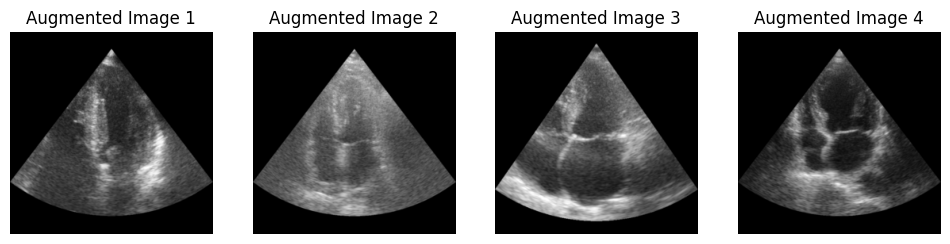

In [ ]:
# Create a sample dataset and loader
sample_dataset = CAMUSDataset(train_images_path, train_masks_path, transform=train_transform)
sample_loader = DataLoader(sample_dataset, batch_size=4, shuffle=True)  # Adjust batch_size as needed

# Get a batch of augmented images and masks
images, masks, filenames = next(iter(sample_loader))

# Display the augmented images
fig, axs = plt.subplots(1, 4, figsize=(12, 3))  # Adjust figure size as needed

for i in range(4):  # Assuming batch_size of 4
    # Denormalize the image
    image = images[i].cpu().numpy().transpose(1, 2, 0) * 0.5 + 0.5
    axs[i].imshow(image)
    axs[i].set_title(f"Augmented Image {i + 1}")
    axs[i].axis("off")

plt.show()

# Model Initialization  

## UNet 1

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels, batch_norm=True, dropout=0.0):
        super(DoubleConv, self).__init__()
        layers = [
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        ]
        if batch_norm:
            layers.append(nn.BatchNorm2d(out_channels))
        layers.append(nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU(inplace=True))
        if batch_norm:
            layers.append(nn.BatchNorm2d(out_channels))
        if dropout > 0.0:
            layers.append(nn.Dropout(dropout))

        self.double_conv = nn.Sequential(*layers)

    def forward(self, x):
        return self.double_conv(x)

class UNet(nn.Module):
    def __init__(self, in_channels=1, num_classes=4, init_filters=32, num_layers=4, batch_norm=True, dropout=0.1):
        super(UNet, self).__init__()

        self.encoders = nn.ModuleList()
        self.decoders = nn.ModuleList()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Encoder path
        filters = init_filters
        for i in range(num_layers):
            self.encoders.append(DoubleConv(in_channels, filters, batch_norm, dropout))
            in_channels = filters
            filters *= 2

        # Bottleneck
        self.bottleneck = DoubleConv(in_channels, filters, batch_norm, dropout)

        # Decoder path
        filters //= 2
        for i in range(num_layers):
            self.decoders.append(nn.ConvTranspose2d(filters * 2, filters, kernel_size=2, stride=2))
            self.decoders.append(DoubleConv(filters * 2, filters, batch_norm, dropout))
            filters //= 2

        # Final output layer
        self.final_conv = nn.Conv2d(init_filters, num_classes, kernel_size=1)

    def forward(self, x):
        skip_connections = []

        # Encoder
        for encoder in self.encoders:
            x = encoder(x)
            skip_connections.append(x)
            x = self.pool(x)

        # Bottleneck
        x = self.bottleneck(x)

        # Decoder
        skip_connections = skip_connections[::-1]
        for i in range(len(self.decoders) // 2):
            x = self.decoders[i * 2](x)
            x = torch.cat((x, skip_connections[i]), dim=1)
            x = self.decoders[i * 2 + 1](x)

        return self.final_conv(x)

# Initialize the model
model = UNet(
    in_channels=3,
    num_classes=4,
    init_filters=32,
    num_layers=4,
    batch_norm=True,
    dropout=0.1
)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

# Print model summary
print(model)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Print the number of trainable parameters
print(f"Trainable Parameters: {count_parameters(model):,}")

UNet(
  (encoders): ModuleList(
    (0): DoubleConv(
      (double_conv): Sequential(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
        (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): ReLU(inplace=True)
        (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (6): Dropout(p=0.1, inplace=False)
      )
    )
    (1): DoubleConv(
      (double_conv): Sequential(
        (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
        (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): ReLU(inplace=True)
        (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_

In [13]:
!pip install ptflops

In [14]:
from ptflops import get_model_complexity_info
import torch

input_shape = (3, 256, 256)  # (channels, height, width)

with torch.cuda.device(0):  # or 'cpu'
    macs, params = get_model_complexity_info(model, input_shape, as_strings=True,
                                             print_per_layer_stat=False, verbose=False)

print(f"FLOPs: {macs}")
print(f"Parameters: {params}")

FLOPs: 13.78 GMac
Parameters: 7.77 M


In [15]:
macs, params = get_model_complexity_info(model, input_shape, as_strings=False)
gflops = (macs * 2) / 1e9
print(f"GFLOPs: {gflops:.2f}")

UNet(
  7.77 M, 100.000% Params, 13.76 GMac, 99.855% MACs, 
  (encoders): ModuleList(
    (0): DoubleConv(
      10.27 k, 0.132% Params, 677.38 MMac, 4.916% MACs, 
      (double_conv): Sequential(
        10.27 k, 0.132% Params, 677.38 MMac, 4.916% MACs, 
        (0): Conv2d(896, 0.012% Params, 58.72 MMac, 0.426% MACs, 3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(0, 0.000% Params, 2.1 MMac, 0.015% MACs, inplace=True)
        (2): BatchNorm2d(64, 0.001% Params, 4.19 MMac, 0.030% MACs, 32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Conv2d(9.25 k, 0.119% Params, 606.08 MMac, 4.398% MACs, 32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): ReLU(0, 0.000% Params, 2.1 MMac, 0.015% MACs, inplace=True)
        (5): BatchNorm2d(64, 0.001% Params, 4.19 MMac, 0.030% MACs, 32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (6): Dropout(0, 0.000% Params, 0.0 Mac, 0.000% MACs, p=0.1, inplace

In [16]:
# import torchvision.models as models
import torch
from ptflops import get_model_complexity_info
import re

#Model thats already available
macs, params = get_model_complexity_info(model, (3, 256, 256), as_strings=True,
print_per_layer_stat=True, verbose=True)
# Extract the numerical value
flops = eval(re.findall(r'([\d.]+)', macs)[0])*2
# Extract the unit
flops_unit = re.findall(r'([A-Za-z]+)', macs)[0][0]

print('Computational complexity: {:<8}'.format(macs))
print('Computational complexity: {} {}Flops'.format(flops, flops_unit))
print('Number of parameters: {:<8}'.format(params))

UNet(
  7.77 M, 100.000% Params, 13.76 GMac, 99.855% MACs, 
  (encoders): ModuleList(
    (0): DoubleConv(
      10.27 k, 0.132% Params, 677.38 MMac, 4.916% MACs, 
      (double_conv): Sequential(
        10.27 k, 0.132% Params, 677.38 MMac, 4.916% MACs, 
        (0): Conv2d(896, 0.012% Params, 58.72 MMac, 0.426% MACs, 3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(0, 0.000% Params, 2.1 MMac, 0.015% MACs, inplace=True)
        (2): BatchNorm2d(64, 0.001% Params, 4.19 MMac, 0.030% MACs, 32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Conv2d(9.25 k, 0.119% Params, 606.08 MMac, 4.398% MACs, 32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): ReLU(0, 0.000% Params, 2.1 MMac, 0.015% MACs, inplace=True)
        (5): BatchNorm2d(64, 0.001% Params, 4.19 MMac, 0.030% MACs, 32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (6): Dropout(0, 0.000% Params, 0.0 Mac, 0.000% MACs, p=0.1, inplace

#Multi-Class Dice Loss and IoU Calculation

In [ ]:
# Custom MultiClassDiceLoss
class MultiClassDiceLoss(nn.Module):
    def __init__(self, from_logits=True, eps=1e-6):
        """
        Initialize the MultiClassDiceLoss.

        Args:
            from_logits (bool): If True, applies softmax to predictions first
            Logits are the raw output values from the final layer of a neural network before any activation function (like softmax) is applied. They're essentially the unnormalized predictions.
            eps (float): Small constant to avoid division by zero
        """
        super().__init__()  # Initialize parent class (nn.Module)
        self.from_logits = from_logits  # Whether input is raw logits
        self.eps = eps  # Small epsilon to prevent division by zero

    def forward(self, y_pred, y_true):
        """
        Compute the multi-class Dice loss.

        Args:
            y_pred: Model predictions (B, C, H, W)
            Variables:
              B: Batch size - The number of samples in the batch.
              C: Number of channels - In semantic segmentation, this usually corresponds to the number of classes.
              H: Height of the feature maps/images.
              W: Width of the feature maps/images.
            y_true: Ground truth labels (B, H, W) with class indices
        """
        # If predictions are logits, convert to probabilities
        if self.from_logits:
            y_pred = torch.softmax(y_pred, dim=1)  # Apply softmax along channel dimension

        B, C, H, W = y_pred.shape  # Get dimensions of prediction tensor
        dice_loss = 0.0  # Initialize total loss

        # Iterate over each class
        for c in range(C):
            # Convert ground truth to one-hot for current class
            y_true_c = (y_true == c).float()  # Binary mask for class c

            # Get predictions for current class
            y_pred_c = y_pred[:, c, :, :]  # Probability map for class c

            # Calculate intersection (TP)
            intersection = (y_pred_c * y_true_c).sum(dim=(1,2))

            # Calculate union (total area)
            union = y_pred_c.sum(dim=(1,2)) + y_true_c.sum(dim=(1,2))

            # Calculate Dice coefficient for current class
            dice_c = (2.0 * intersection + self.eps) / (union + self.eps)

            # Add (1 - dice) to total loss
            dice_loss += (1 - dice_c.mean())

        # Return average loss across all classes
        return dice_loss / C

# Example usage and parameter descriptions:

# For MultiClassDiceLoss:
criterion = MultiClassDiceLoss(
    from_logits=True,  # Set True if model outputs raw logits
    eps=1e-6  # Small constant for numerical stability
)

In [ ]:
# Manual IoU Implementation
def compute_iou_manual(pred, target, num_classes=NUM_CLASSES):
    """
    Manually compute IoU (Intersection over Union) for semantic segmentation.

    Args:
        pred (torch.Tensor): Predicted segmentation mask
        target (torch.Tensor): Ground truth segmentation mask
        num_classes (int): Number of classes in the segmentation task

    Returns:
        float: Mean IoU across all classes
    """
    ious = []  # Store IoU for each class
    for c in range(num_classes):
        # Create binary masks for current class
        pred_c = (pred == c)  # Prediction mask for class c
        target_c = (target == c)  # Ground truth mask for class c

        # Calculate intersection and union
        intersection = (pred_c & target_c).sum().item()  # Logical AND for intersection
        union = (pred_c | target_c).sum().item()  # Logical OR for union

        # Calculate IoU if union is non-zero
        if union > 0:
            ious.append(intersection / (union + 1e-6))  # Add small epsilon to prevent division by zero

    # Handle edge case where no valid classes are found
    if len(ious) == 0:
        return 1.0

    # Return mean IoU across all valid classes
    return sum(ious) / len(ious)

#  Training and Validation Workflow for Semantic Segmentation

In [ ]:

########################################
# Training & Validation Functions      #
########################################


def train(model, loader, optimizer, criterion, device):
    model.train()
    epoch_loss = 0.0
    epoch_iou = 0.0
    scaler = GradScaler()

    with tqdm(total=len(loader), desc='Training') as pbar:
        for images, masks, _ in loader:
            images, masks = images.to(device), masks.to(device)
            optimizer.zero_grad()
            with torch.amp.autocast(device_type='cuda'):
                outputs = model(images)
                loss = criterion(outputs, masks)
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            preds = torch.argmax(outputs, dim=1)
            batch_iou = compute_iou_manual(preds, masks, num_classes=NUM_CLASSES)

            epoch_loss += loss.item()
            epoch_iou += batch_iou
            pbar.update(1)

    return epoch_loss / len(loader), epoch_iou / len(loader)

In [ ]:
def validate(model, loader, criterion, device):
    model.eval()
    val_loss = 0.0
    val_iou = 0.0
    with torch.no_grad():
        with tqdm(total=len(loader), desc='Validation') as pbar:
            for images, masks, _ in loader:
                images, masks = images.to(device), masks.to(device)
                with torch.amp.autocast(device_type='cuda'):
                    outputs = model(images)
                    loss = criterion(outputs, masks)
                preds = torch.argmax(outputs, dim=1)
                batch_iou = compute_iou_manual(preds, masks, num_classes=NUM_CLASSES)
                val_loss += loss.item()
                val_iou += batch_iou
                pbar.update(1)

    return val_loss / len(loader), val_iou / len(loader)



---

# Training Loop




Epoch 1/30


Validation: 100%|██████████| 2/2 [01:57<00:00, 58.57s/it]
<ipython-input-19-1e26f438f8c3>:140: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load

Train Loss: 0.7847, Train Dice: 0.3223
Val Loss: 0.8346, Val Dice: 0.0796
Epoch 1 Training Time: 902.15 sec
Model saved!


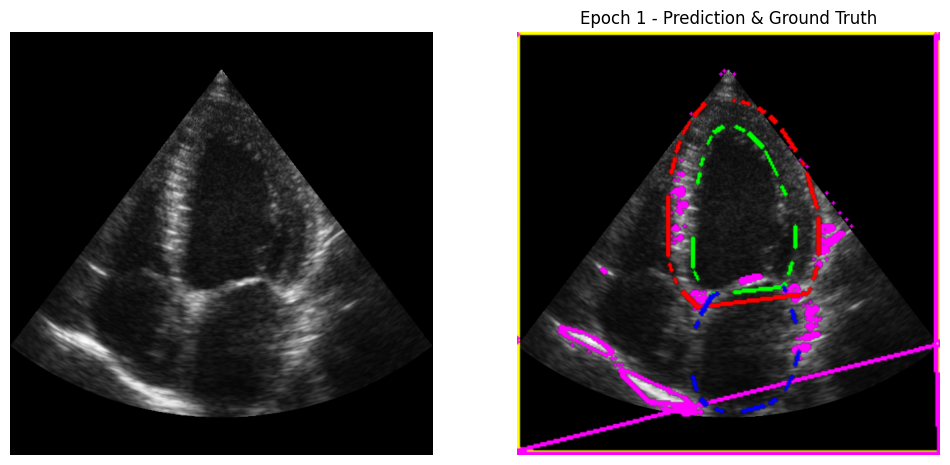

Epoch 2/30


Validation: 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]


Train Loss: 0.6839, Train Dice: 0.4722
Val Loss: 0.7917, Val Dice: 0.4047
Epoch 2 Training Time: 16.88 sec
Model saved!


<Figure size 640x480 with 0 Axes>

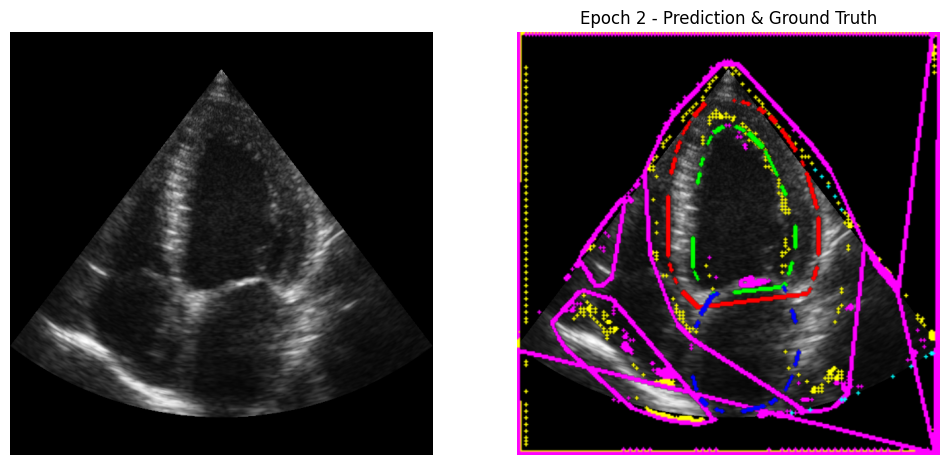

Epoch 3/30


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]


Train Loss: 0.6004, Train Dice: 0.5652
Val Loss: 0.6515, Val Dice: 0.5572
Epoch 3 Training Time: 17.11 sec
Model saved!


<Figure size 640x480 with 0 Axes>

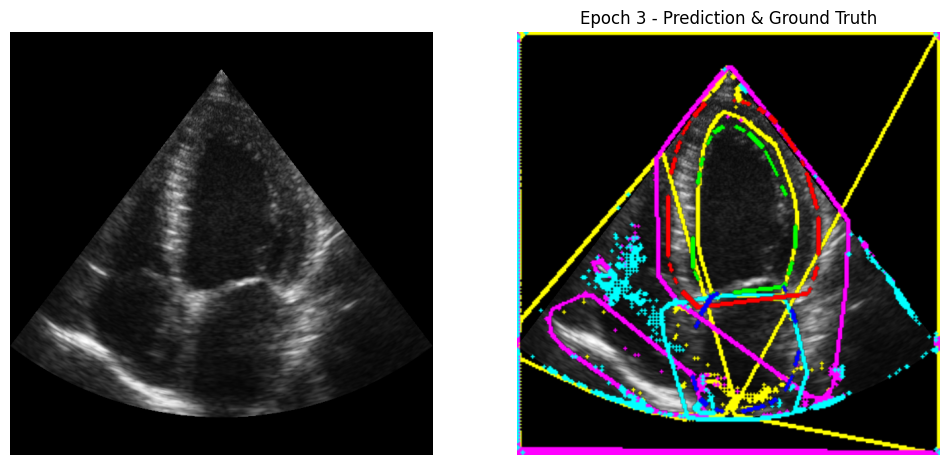

Epoch 4/30


Validation: 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]


Train Loss: 0.5470, Train Dice: 0.6140
Val Loss: 0.5490, Val Dice: 0.6643
Epoch 4 Training Time: 16.95 sec
Model saved!


<Figure size 640x480 with 0 Axes>

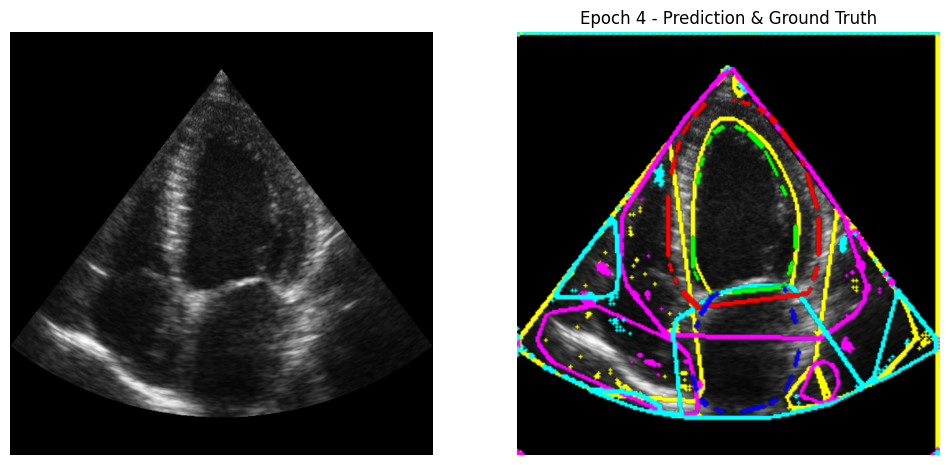

Epoch 5/30


Validation: 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]


Train Loss: 0.5154, Train Dice: 0.6542
Val Loss: 0.4866, Val Dice: 0.6979
Epoch 5 Training Time: 17.15 sec
Model saved!


<Figure size 640x480 with 0 Axes>

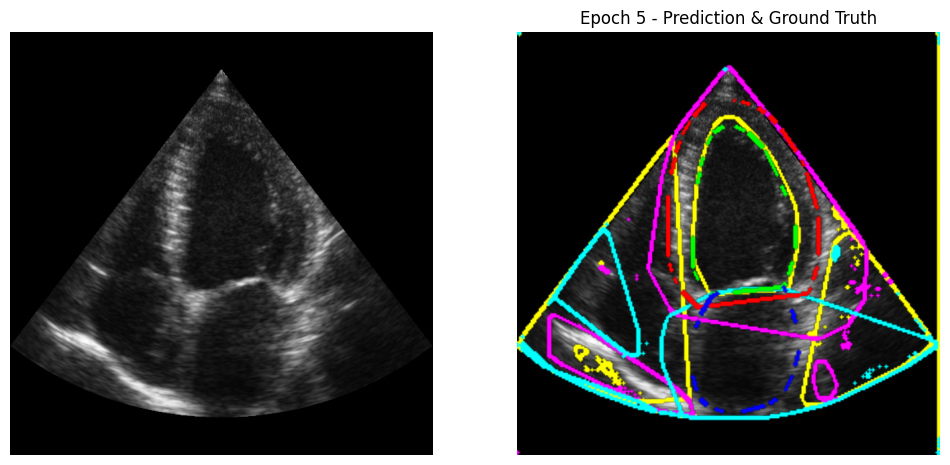

Epoch 6/30


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]


Train Loss: 0.4945, Train Dice: 0.6829
Val Loss: 0.4671, Val Dice: 0.6976
Epoch 6 Training Time: 18.17 sec
Model saved!


<Figure size 640x480 with 0 Axes>

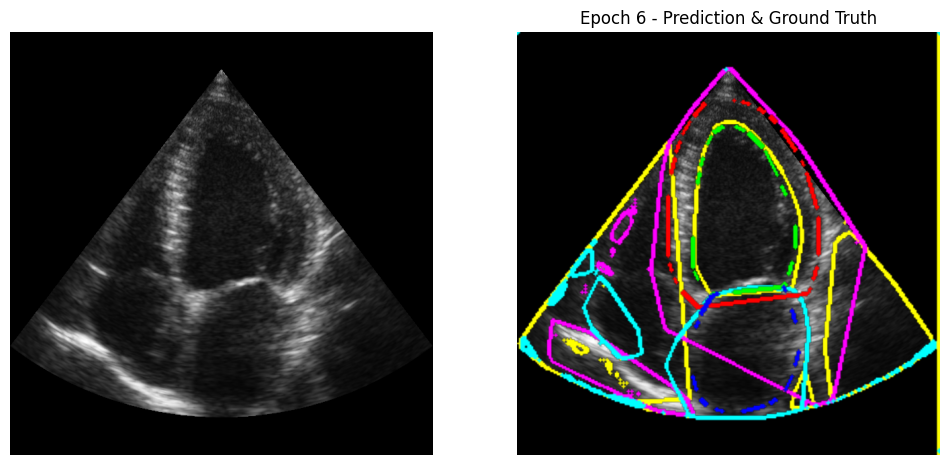

Epoch 7/30


Validation: 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]


Train Loss: 0.4772, Train Dice: 0.7162
Val Loss: 0.4442, Val Dice: 0.7526
Epoch 7 Training Time: 17.16 sec
Model saved!


<Figure size 640x480 with 0 Axes>

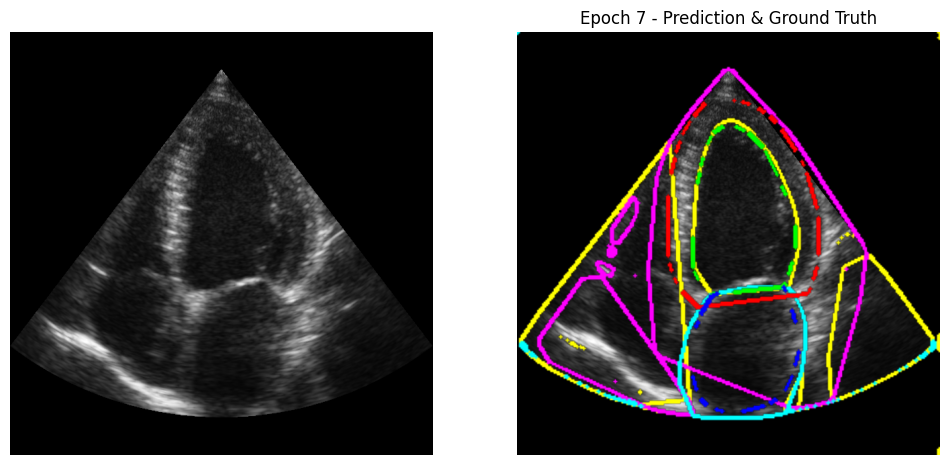

Epoch 8/30


Validation: 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]


Train Loss: 0.4646, Train Dice: 0.7409
Val Loss: 0.4589, Val Dice: 0.7455
Epoch 8 Training Time: 17.25 sec
Epoch 9/30


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.41s/it]


Train Loss: 0.4516, Train Dice: 0.7639
Val Loss: 0.4357, Val Dice: 0.7560
Epoch 9 Training Time: 18.33 sec
Model saved!


<Figure size 640x480 with 0 Axes>

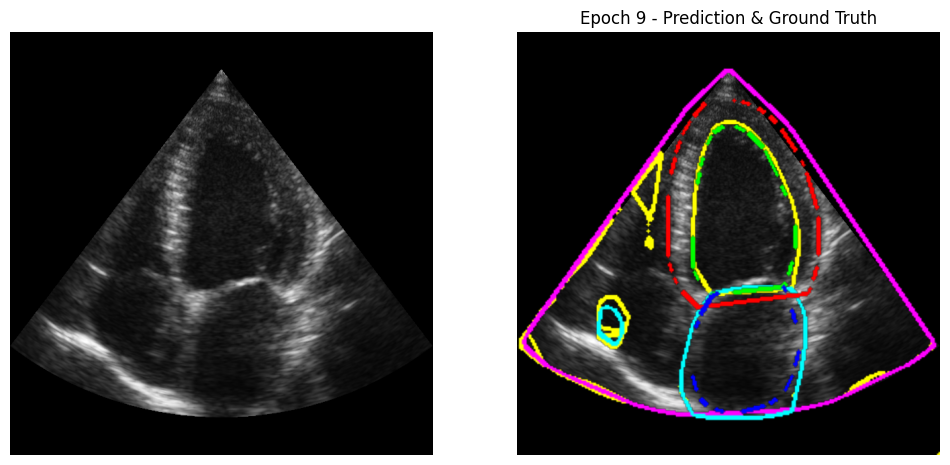

Epoch 10/30


Validation: 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]


Train Loss: 0.4406, Train Dice: 0.7766
Val Loss: 0.4390, Val Dice: 0.7396
Epoch 10 Training Time: 16.96 sec
Epoch 11/30


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


Train Loss: 0.4303, Train Dice: 0.7800
Val Loss: 0.4351, Val Dice: 0.7669
Epoch 11 Training Time: 18.10 sec
Model saved!


<Figure size 640x480 with 0 Axes>

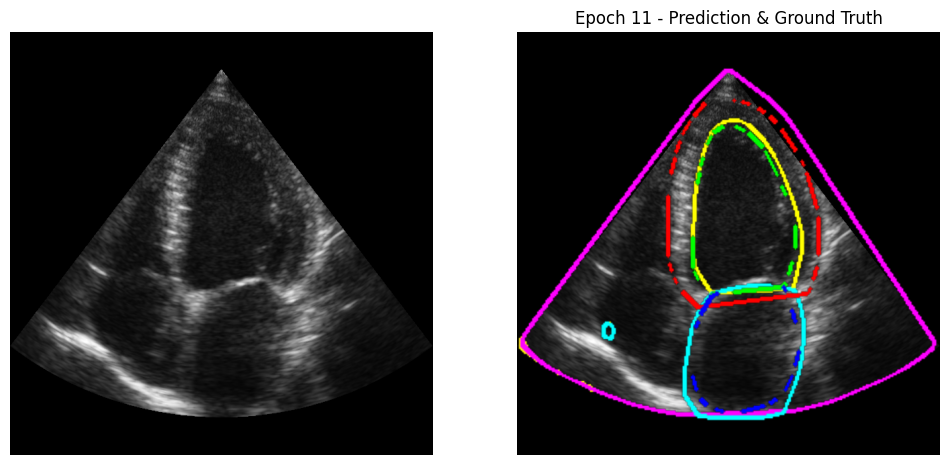

Epoch 12/30


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.42s/it]


Train Loss: 0.4222, Train Dice: 0.7830
Val Loss: 0.4153, Val Dice: 0.7715
Epoch 12 Training Time: 18.39 sec
Model saved!


<Figure size 640x480 with 0 Axes>

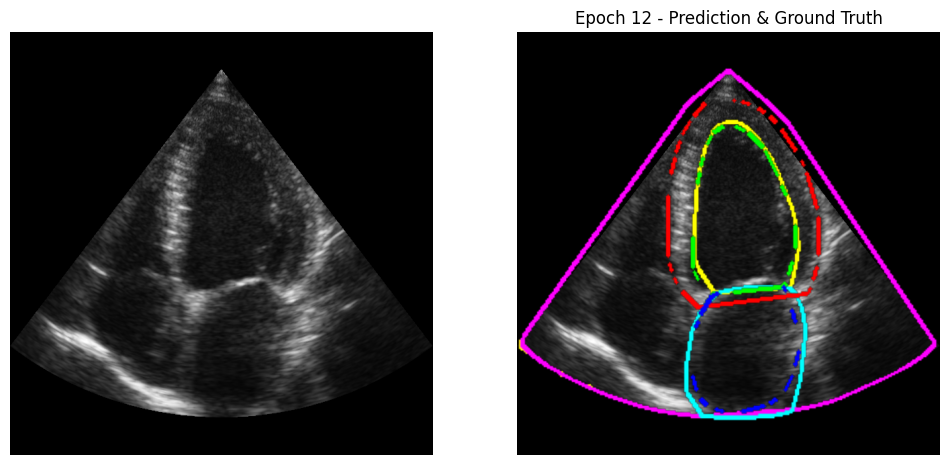

Epoch 13/30


Validation: 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]


Train Loss: 0.4140, Train Dice: 0.7881
Val Loss: 0.4136, Val Dice: 0.7543
Epoch 13 Training Time: 17.17 sec
Model saved!


<Figure size 640x480 with 0 Axes>

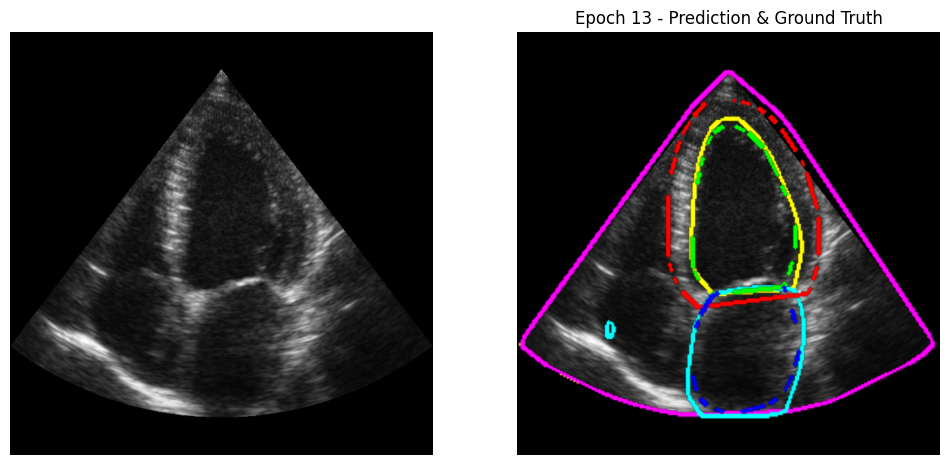

Epoch 14/30


Validation: 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]


Train Loss: 0.4062, Train Dice: 0.7916
Val Loss: 0.4032, Val Dice: 0.7626
Epoch 14 Training Time: 17.20 sec
Model saved!


<Figure size 640x480 with 0 Axes>

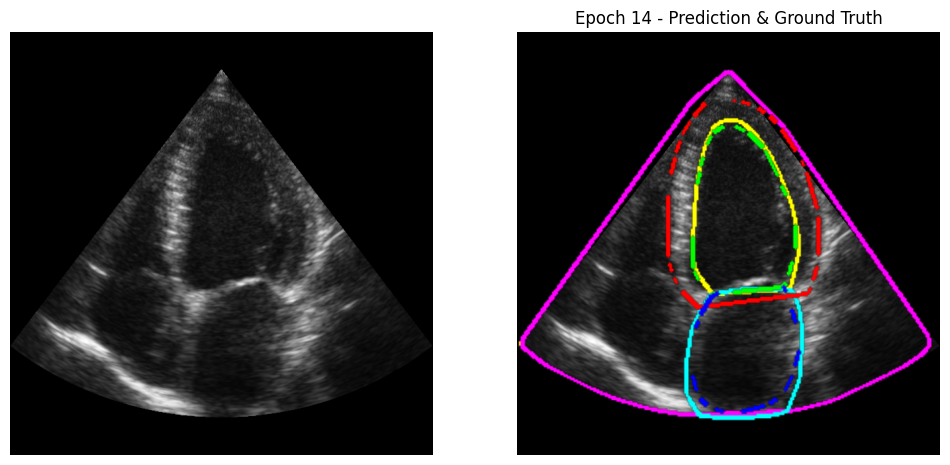

Epoch 15/30


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.41s/it]


Train Loss: 0.4010, Train Dice: 0.7913
Val Loss: 0.4067, Val Dice: 0.7522
Epoch 15 Training Time: 18.28 sec
Epoch 16/30


Validation: 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]


Train Loss: 0.3934, Train Dice: 0.7955
Val Loss: 0.3944, Val Dice: 0.7797
Epoch 16 Training Time: 17.23 sec
Model saved!


<Figure size 640x480 with 0 Axes>

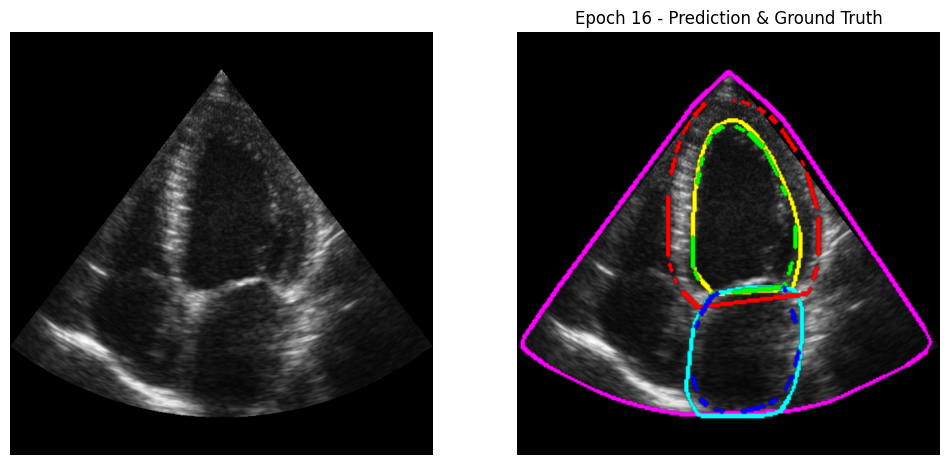

Epoch 17/30


Validation: 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]


Train Loss: 0.3853, Train Dice: 0.7990
Val Loss: 0.3942, Val Dice: 0.7711
Epoch 17 Training Time: 17.13 sec
Model saved!


<Figure size 640x480 with 0 Axes>

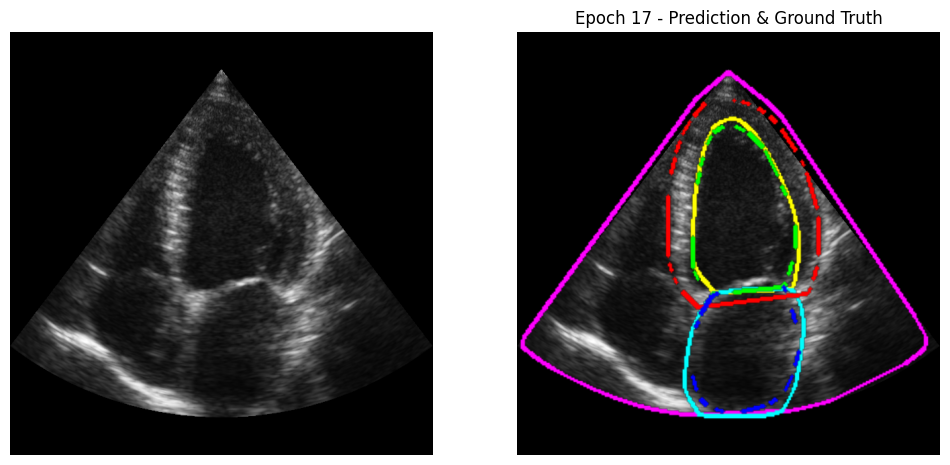

Epoch 18/30


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]


Train Loss: 0.3792, Train Dice: 0.8020
Val Loss: 0.3925, Val Dice: 0.7647
Epoch 18 Training Time: 18.05 sec
Model saved!


<Figure size 640x480 with 0 Axes>

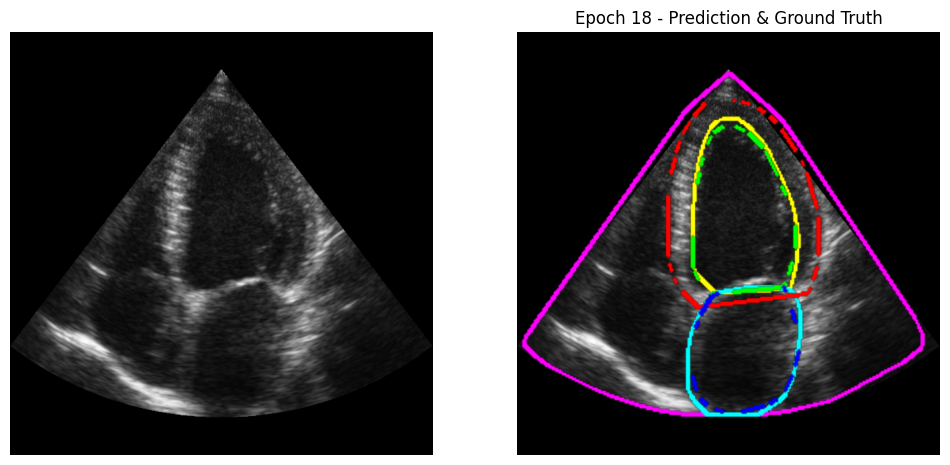

Epoch 19/30


Validation: 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]


Train Loss: 0.3727, Train Dice: 0.8043
Val Loss: 0.3840, Val Dice: 0.7639
Epoch 19 Training Time: 17.77 sec
Model saved!


<Figure size 640x480 with 0 Axes>

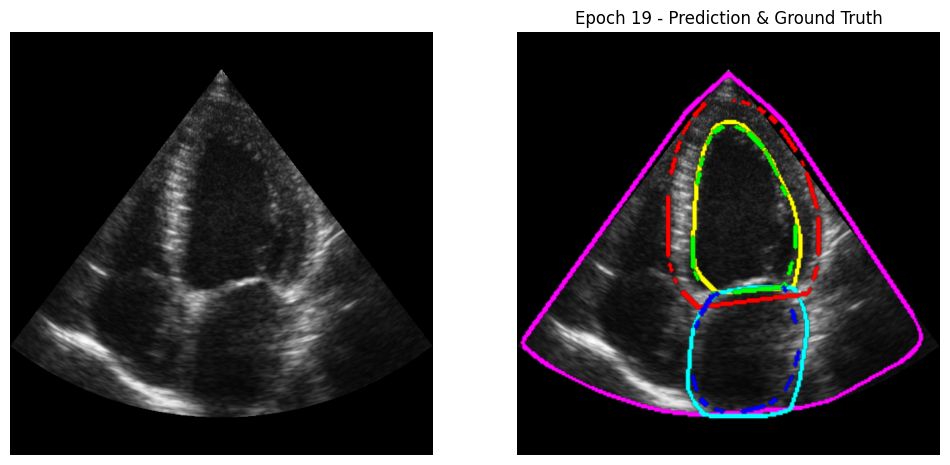

Epoch 20/30


Validation: 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]


Train Loss: 0.3671, Train Dice: 0.8048
Val Loss: 0.3751, Val Dice: 0.7812
Epoch 20 Training Time: 17.34 sec
Model saved!


<Figure size 640x480 with 0 Axes>

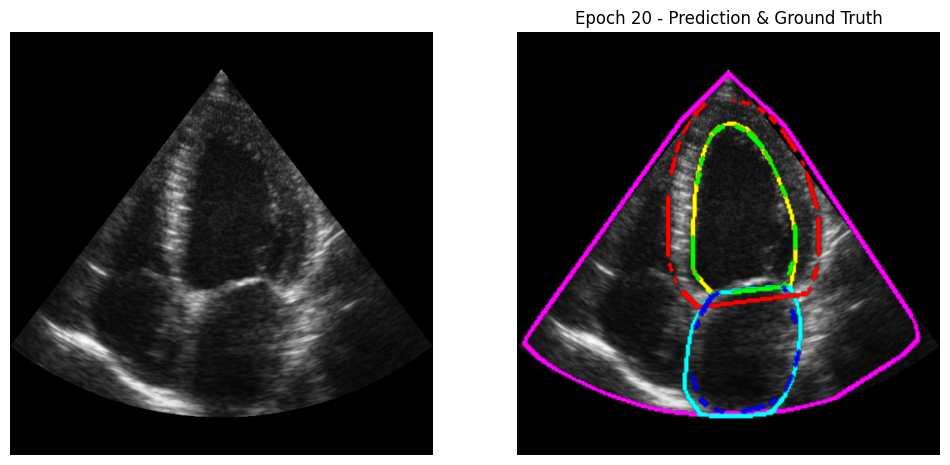

Epoch 21/30


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.30s/it]


Train Loss: 0.3611, Train Dice: 0.8076
Val Loss: 0.3700, Val Dice: 0.7759
Epoch 21 Training Time: 18.25 sec
Model saved!


<Figure size 640x480 with 0 Axes>

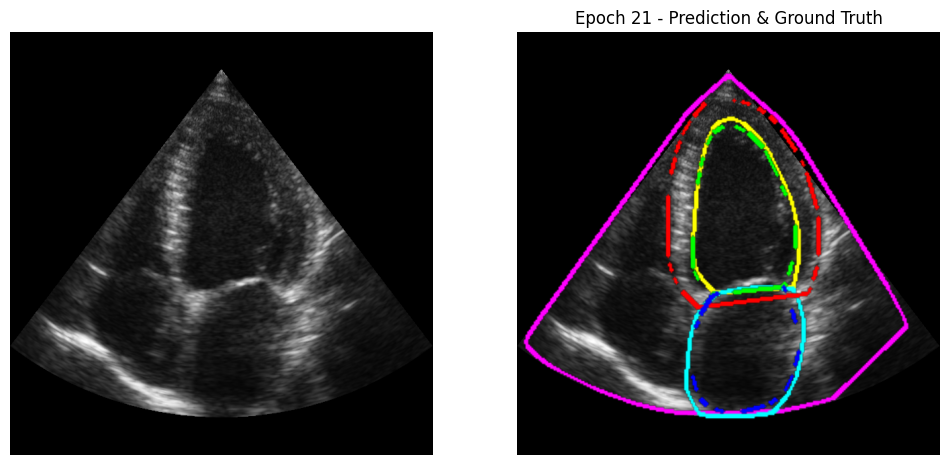

Epoch 22/30


Validation: 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]


Train Loss: 0.3545, Train Dice: 0.8118
Val Loss: 0.3742, Val Dice: 0.7733
Epoch 22 Training Time: 17.72 sec
Epoch 23/30


Validation: 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]


Train Loss: 0.3464, Train Dice: 0.8186
Val Loss: 0.3470, Val Dice: 0.7943
Epoch 23 Training Time: 17.40 sec
Model saved!


<Figure size 640x480 with 0 Axes>

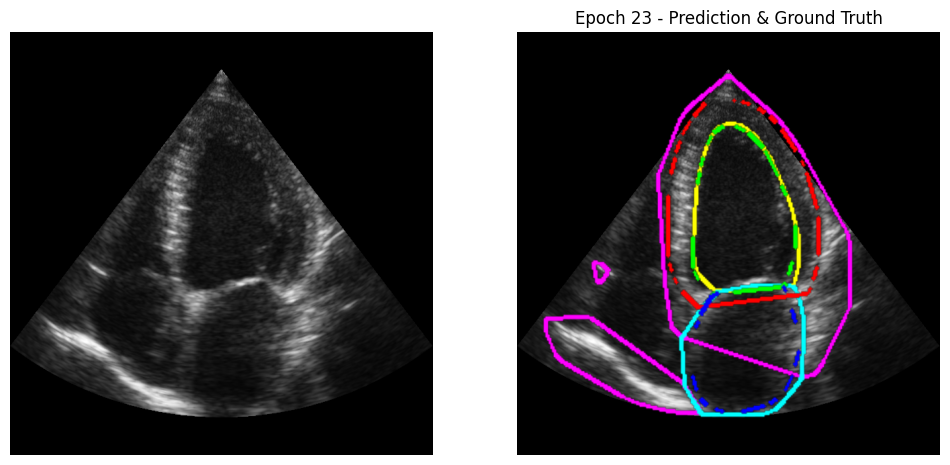

Epoch 24/30


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.44s/it]


Train Loss: 0.3352, Train Dice: 0.8290
Val Loss: 0.3363, Val Dice: 0.8036
Epoch 24 Training Time: 19.97 sec
Model saved!


<Figure size 640x480 with 0 Axes>

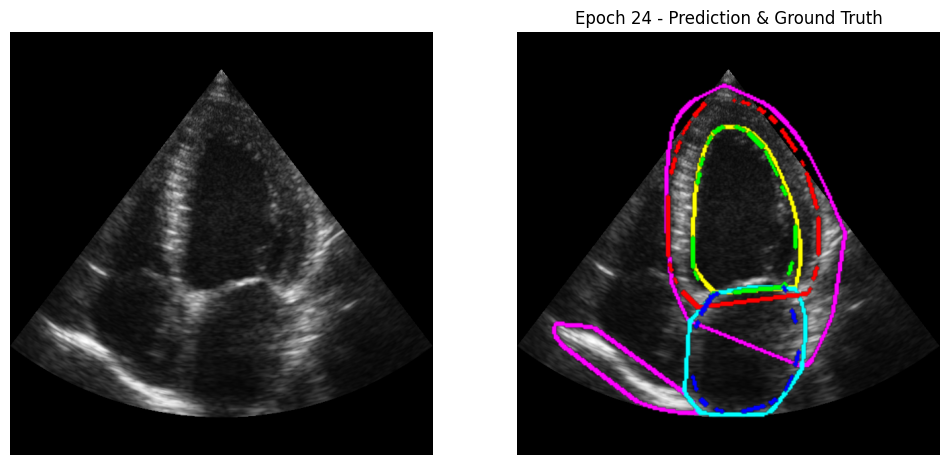

Epoch 25/30


Validation: 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]


Train Loss: 0.3239, Train Dice: 0.8406
Val Loss: 0.3097, Val Dice: 0.8184
Epoch 25 Training Time: 17.56 sec
Model saved!


<Figure size 640x480 with 0 Axes>

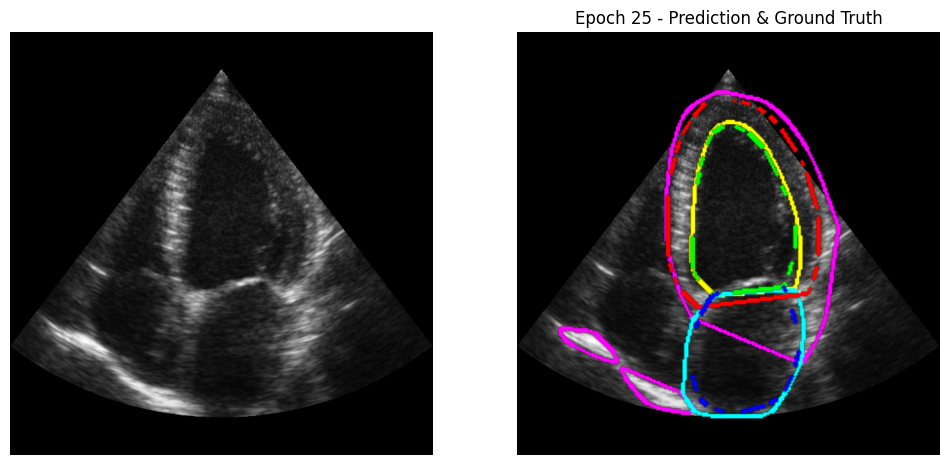

Epoch 26/30


Validation: 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]


Train Loss: 0.3144, Train Dice: 0.8501
Val Loss: 0.3039, Val Dice: 0.8154
Epoch 26 Training Time: 17.66 sec
Model saved!


<Figure size 640x480 with 0 Axes>

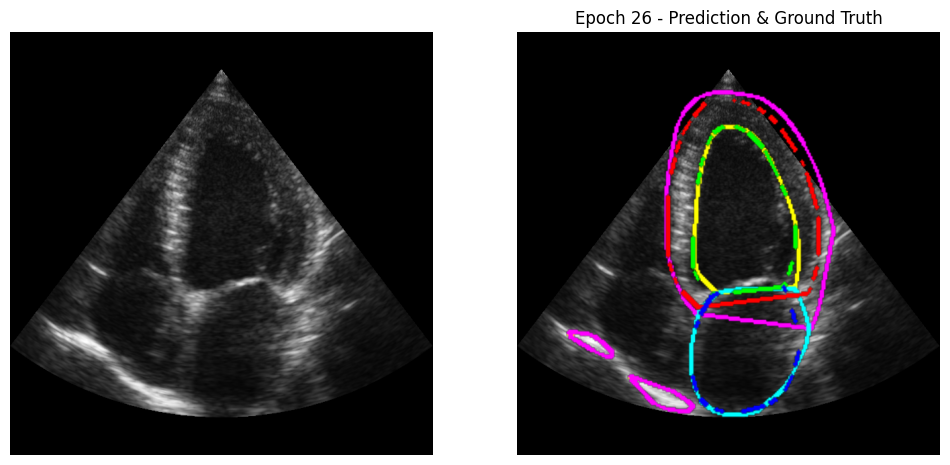

Epoch 27/30


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.27s/it]


Train Loss: 0.3037, Train Dice: 0.8563
Val Loss: 0.2973, Val Dice: 0.8228
Epoch 27 Training Time: 18.58 sec
Model saved!


<Figure size 640x480 with 0 Axes>

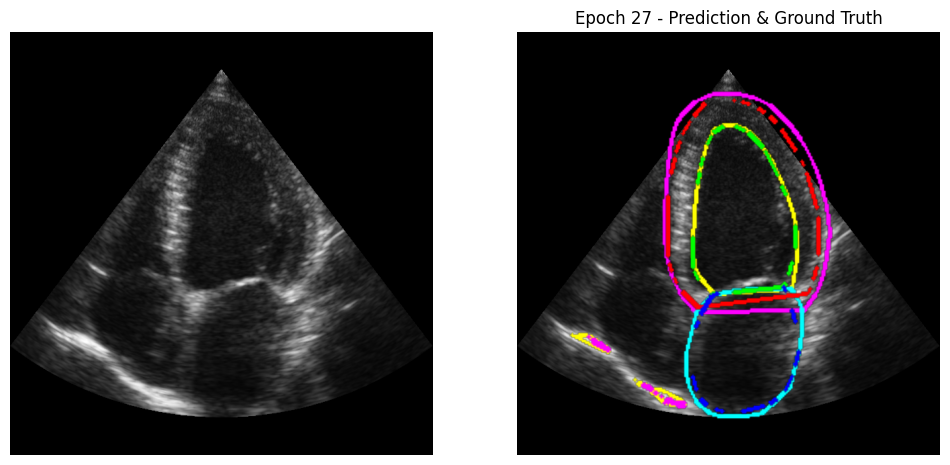

Epoch 28/30


Validation: 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]


Train Loss: 0.2930, Train Dice: 0.8592
Val Loss: 0.2919, Val Dice: 0.8292
Epoch 28 Training Time: 17.53 sec
Model saved!


<Figure size 640x480 with 0 Axes>

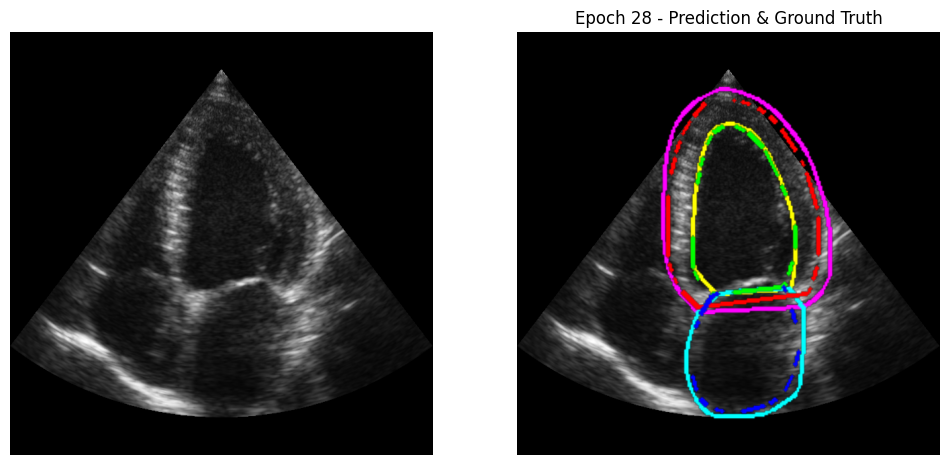

Epoch 29/30


Validation: 100%|██████████| 2/2 [00:01<00:00,  1.00it/s]


Train Loss: 0.2818, Train Dice: 0.8652
Val Loss: 0.2962, Val Dice: 0.8138
Epoch 29 Training Time: 17.67 sec
Epoch 30/30


Validation: 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]


Train Loss: 0.2712, Train Dice: 0.8681
Val Loss: 0.3285, Val Dice: 0.7897
Epoch 30 Training Time: 18.74 sec
Total Training Time: 23.88 minutes
Average Training Speed: 47.20 sec/epoch
Video saved successfully with 24 frames!


<Figure size 640x480 with 0 Axes>

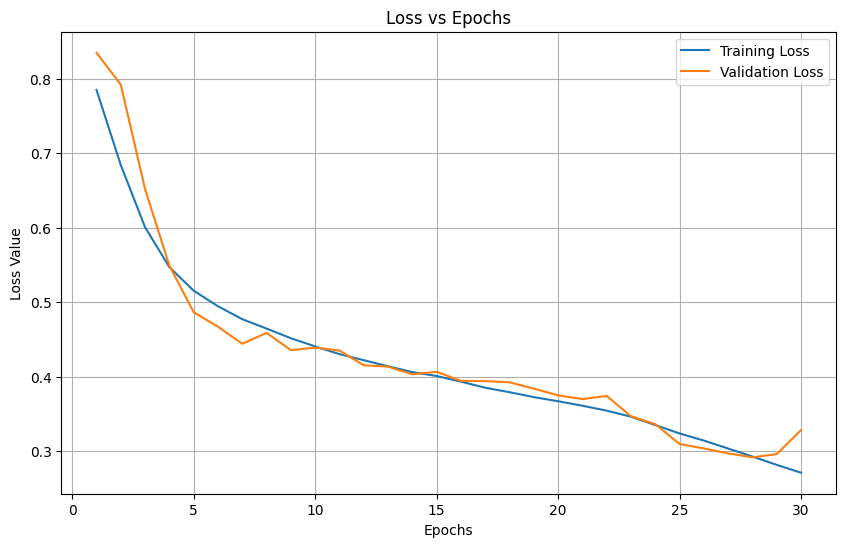

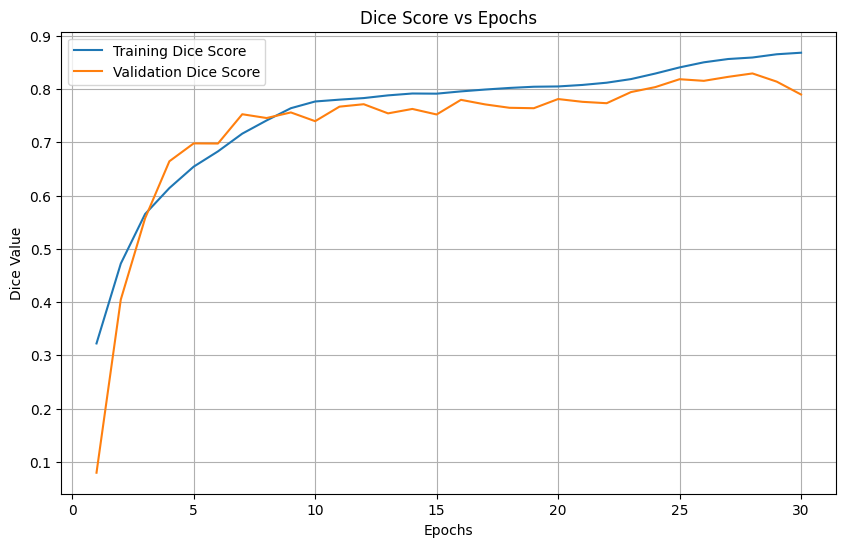

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import torch

# Lists to store metrics
train_losses = []
val_losses = []
train_dices = []
val_dices = []
best_val_loss = float('inf')
patience = 0
prediction_frames = []

# Color schemes
pred_colors = {1: (0, 255, 255), 2: (255, 0, 255), 3: (255, 255, 0)}  # Yellow, Magenta, Cyan
gt_colors = {1: (0, 255, 0), 2: (0, 0, 255), 3: (255, 0, 0)}  # Green, Blue, Red

def create_solid_contours(mask, class_colors, thickness=2, alpha=1):
    mask_solid = np.zeros((*mask.shape, 4), dtype=np.uint8)
    for c, color in class_colors.items():
        binary_mask = (mask == c).astype(np.uint8)
        contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        convex_contours = [cv2.convexHull(cnt) for cnt in contours]
        cv2.drawContours(mask_solid, convex_contours, -1, (*color, int(255 * alpha)), thickness=thickness)
    return mask_solid

def create_hashed_overlay(mask, class_colors, thickness=2, dash_length=2, gap_length=7, alpha=1):
    mask_hashed = np.zeros((*mask.shape, 4), dtype=np.uint8)
    for c, color in class_colors.items():
        binary_mask = (mask == c).astype(np.uint8)
        contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        convex_contours = [cv2.convexHull(cnt) for cnt in contours]
        for cnt in convex_contours:
            perimeter = cv2.arcLength(cnt, True)
            num_points = max(2, int(perimeter / (dash_length + gap_length)))
            resampled_points = [cnt[i][0] for i in np.linspace(0, len(cnt)-1, num_points, dtype=int)]
            for i in range(0, len(resampled_points)-1, 2):
                cv2.line(mask_hashed, tuple(resampled_points[i]), tuple(resampled_points[i+1]), (*color, int(255 * alpha)), thickness)
    return mask_hashed

def plot_metrics(train_metric, val_metric, metric_name, ylabel):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_metric) + 1), train_metric, label=f'Training {metric_name}')
    plt.plot(range(1, len(val_metric) + 1), val_metric, label=f'Validation {metric_name}')
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.title(f'{metric_name} vs Epochs')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{metric_name.lower()}_plot.png')
    plt.show()
    plt.close()

def visualize_prediction_and_show(model, dataset, idx, epoch, device):
    model.eval()
    original_image_path = os.path.join(test_images_path, test_dataset.images[idx])
    original_image = cv2.imread(original_image_path)

    image, mask, _ = dataset[idx]
    with torch.no_grad():
        pred = torch.argmax(model(image.unsqueeze(0).to(device)), dim=1).squeeze(0).cpu().numpy()

    # Create overlays
    pred_solid = create_solid_contours(pred, pred_colors)
    gt_hashed = create_hashed_overlay(mask.cpu().numpy(), gt_colors)

    # Resize to match original image size
    pred_solid = cv2.resize(pred_solid, (original_image.shape[1], original_image.shape[0]))
    gt_hashed = cv2.resize(gt_hashed, (original_image.shape[1], original_image.shape[0]))

    # Convert original image to 4-channel (BGRA)
    result = cv2.cvtColor(original_image, cv2.COLOR_BGR2BGRA)

    # Blend overlays
    for overlay in [pred_solid, gt_hashed]:
        alpha = overlay[:, :, 3:4].astype(float) / 255
        result[:, :, :3] = (overlay[:, :, :3] * alpha + result[:, :, :3] * (1 - alpha)).astype(np.uint8)

    # Display results
    plt.figure(figsize=(12, 6))
    for i, img in enumerate([original_image, result]):
        plt.subplot(1, 2, i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    plt.title(f"Epoch {epoch+1} - Prediction & Ground Truth")
    plt.show(block=False)
    plt.pause(0.1)
    plt.clf()

    # Define text properties
    text = f'Epoch: {epoch+1}'
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    thickness = 2

    # Get text size to create a background
    (text_width, text_height), baseline = cv2.getTextSize(text, font, font_scale, thickness)

    # Define text position
    x, y = 10, 30  # Bottom-left corner of the text

    # Draw white rectangle as background
    cv2.rectangle(result, (x - 5, y - text_height - 5), (x + text_width + 5, y + baseline), (255, 255, 255), -1)

    # Add black text on top of the white background
    cv2.putText(result, text, (x, y), font, font_scale, (0, 0, 0), thickness, cv2.LINE_AA)

    # Convert result to BGR for saving in the video
    prediction_frames.append(cv2.cvtColor(result, cv2.COLOR_BGRA2BGR))

test_image_idx = 21
total_training_start = time.time()  # Start total training time
epoch_times = []  # List to store epoch times

for epoch in range(NBEPOCHS):
    epoch_start = time.time()  # Start time for this epoch
    print(f"Epoch {epoch+1}/{NBEPOCHS}")
    train_loss, train_iou = train(model, train_loader, optimizer, criterion, device)
    val_loss, val_iou = validate(model, valid_loader, criterion, device)

    train_dices.append(2 * train_iou / (1 + train_iou))
    val_dices.append(2 * val_iou / (1 + val_iou))
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    epoch_end = time.time()  # End time for this epoch
    epoch_time = epoch_end - epoch_start  # Calculate training time for this epoch
    epoch_times.append(epoch_time)  # Store epoch time

    print(f"Train Loss: {train_loss:.4f}, Train Dice: {train_dices[-1]:.4f}")
    print(f"Val Loss: {val_loss:.4f}, Val Dice: {val_dices[-1]:.4f}")
    print(f"Epoch {epoch+1} Training Time: {epoch_time:.2f} sec")

    if val_loss < best_val_loss:
        best_val_loss, patience = val_loss, 0
        torch.save(model.state_dict(), os.path.join(model_path, "best_model.pth"))
        print("Model saved!")
        model.load_state_dict(torch.load(os.path.join(model_path, "best_model.pth")))
        visualize_prediction_and_show(model, test_dataset, test_image_idx, epoch, device)
    else:
        patience += 1
        if patience >= NBPATIENCE_EPOCHS:
            print("Early stopping triggered!")
            break

# Calculate total training time
total_training_end = time.time()
total_training_time = (total_training_end - total_training_start) / 60  # Convert to minutes

# Calculate average training speed per epoch
average_epoch_time = sum(epoch_times) / len(epoch_times)

print(f"Total Training Time: {total_training_time:.2f} minutes")
print(f"Average Training Speed: {average_epoch_time:.2f} sec/epoch")

# Save predictions as a video
if prediction_frames:
    height, width = prediction_frames[0].shape[:2]

    # Define the codec and create VideoWriter object
    video_writer = cv2.VideoWriter("predictions_only_video.avi",
                                   cv2.VideoWriter_fourcc(*'XVID'),
                                   2,  # FPS
                                   (width, height))

    for frame in prediction_frames:
        video_writer.write(frame)

    video_writer.release()
    print(f"Video saved successfully with {len(prediction_frames)} frames!")

plot_metrics(train_losses, val_losses, 'Loss', 'Loss Value')
plot_metrics(train_dices, val_dices, 'Dice Score', 'Dice Value')


# Separate datasets for ED and ES frames


In [ ]:
# Separate datasets for ED and ES frames
ed_images = []
es_images = []

# Filter test dataset based on image name
for image, mask, filename in test_dataset:
    # print("Image name: ", filename)
    if filename.endswith("ED.png"):
        # print("Image name ED: ", filename)
        ed_images.append((image, mask))
    elif filename.endswith("ES.png"):
        # print("Image name ES: ", filename)
        es_images.append((image, mask))

# Create DataLoaders for ED and ES frames
ed_loader = DataLoader(ed_images, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)
es_loader = DataLoader(es_images, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

# Evaluation


## Built-in functions

### Test on the whole images

In [ ]:
import torch
import numpy as np
from torchmetrics import Dice, JaccardIndex, F1Score
from medpy.metric.binary import hd, assd
from sklearn.metrics import f1_score
from monai.metrics import HausdorffDistanceMetric, SurfaceDistanceMetric

# Number of classes (excluding background class)
NUM_CLASSES = 4  # Assuming classes 1, 2, 3, ..., NUM_CLASSES - 1 are non-background classes
BACKGROUND_CLASS = 0  # Background class index

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the best model weights
model.load_state_dict(torch.load(os.path.join(model_path, "best_model.pth"), map_location=device))
model.eval()

# Function to compute IoU (Intersection over Union)
def compute_iou(pred, target):
    intersection = (pred * target).sum()
    union = (pred + target).clip(0, 1).sum()
    iou = intersection / (union + 1e-6)
    return iou

# Initialize metrics with ignore_index to exclude the background class
dice_metric = Dice(average="macro", num_classes=NUM_CLASSES, ignore_index=BACKGROUND_CLASS).to(device)
iou_metric = JaccardIndex(task="multiclass", num_classes=NUM_CLASSES, ignore_index=BACKGROUND_CLASS).to(device)
f1_metric = F1Score(task="multiclass", num_classes=NUM_CLASSES, ignore_index=BACKGROUND_CLASS).to(device)
hd_metric = HausdorffDistanceMetric(include_background=False, percentile=95)
assd_metric = SurfaceDistanceMetric(include_background=False)

# Metric Containers
dice_scores = []
iou_scores = []
f1_scores = []
hd_scores = []
assd_scores = []

# Per-class metric
per_class_dice_scores = [[] for _ in range(NUM_CLASSES)]
per_class_iou_scores = [[] for _ in range(NUM_CLASSES)]
per_class_hd_scores = [[] for _ in range(NUM_CLASSES)]
per_class_assd_scores = [[] for _ in range(NUM_CLASSES)]
per_class_f1_scores = [[] for _ in range(NUM_CLASSES)]

# Test loss
num_batches = 0
test_loss = 0

with torch.no_grad():
    for images, masks, _ in test_loader:
        images, masks = images.to(device), masks.to(device)
        outputs = model(images)

        loss = criterion(outputs, masks)
        test_loss += loss.item()

        preds = torch.argmax(outputs, dim=1)

        # Compute overall metrics
        dice_value = dice_metric(preds, masks)
        iou_value = iou_metric(preds, masks)
        f1_value = f1_metric(preds, masks)

        dice_scores.append(dice_value.item())
        iou_scores.append(iou_value.item())
        f1_scores.append(f1_value.item())

        # Compute per-class metrics excluding background
        for cls in range(1, NUM_CLASSES):
            # Extract binary masks for the current class
            preds_cls = (preds == cls).int()
            masks_cls = (masks == cls).int()

            # Compute Dice score for the current class
            dice_score_cls = dice_metric(preds_cls, masks_cls)
            iou_score_cls = compute_iou(preds_cls.float().cpu().numpy(), masks_cls.float().cpu().numpy())

            per_class_dice_scores[cls].append(dice_score_cls.item())
            per_class_iou_scores[cls].append(iou_score_cls.item())

            preds_cls_np = preds_cls.cpu().numpy()
            masks_cls_np = masks_cls.cpu().numpy()

            # Compute F1 score using scikit-learn
            preds_flat = preds_cls_np.flatten()
            masks_flat = masks_cls_np.flatten()
            f1 = f1_score(masks_flat, preds_flat, average="binary", zero_division=0)
            per_class_f1_scores[cls].append(f1)

            # Compute HD and ASSD (requires numpy arrays)
            for p, m in zip(preds_cls_np, masks_cls_np):
                if p.any() and m.any():  # Avoid computation if no foreground in either
                    per_class_hd_scores[cls].append(hd(p, m))
                    per_class_assd_scores[cls].append(assd(p, m))

        # Compute HD and ASSD metrics for the whole batch
        pred_tensor = preds.unsqueeze(1).float()  # Shape: [batch, 1, H, W]
        masks_tensor = masks.unsqueeze(1).float()  # Shape: [batch, 1, H, W]

        hd_metric(y_pred=pred_tensor, y=masks_tensor)
        assd_metric(y_pred=pred_tensor, y=masks_tensor)

        hd_scores.append(hd_metric.aggregate().item())
        assd_scores.append(assd_metric.aggregate().item())

        # Reset MONAI metrics after each batch
        hd_metric.reset()
        assd_metric.reset()

        num_batches += 1

# Compute loss
test_loss /= num_batches

# Compute Overall Averages
overall_dice = sum(dice_scores) / len(dice_scores)
overall_iou = sum(iou_scores) / len(iou_scores)
overall_f1 = sum(f1_scores) / len(f1_scores)
overall_hd = sum(hd_scores) / len(hd_scores)
overall_assd = sum(assd_scores) / len(assd_scores)


print("\nTest Results:")
print(f"Test Loss: {test_loss:.4f}\n")

# Define class names
class_names = ["Left Ventricle", "Myocardium", "Left Atrium"]

# Prepare results for overall evaluation and per-class evaluation
overall_results = [
    ["Overall", f"{overall_dice:.3f}", f"{overall_iou:.3f}", f"{overall_assd:.2f}", f"{overall_hd:.1f}", f"{overall_f1:.3f}"]
]

per_class_results = []
for c in range(1, NUM_CLASSES):  # Exclude background class
    per_class_results.append([
        class_names[c-1],  # Use class names
        f"{np.mean(per_class_dice_scores[c]):.3f}",
        f"{np.nanmean(per_class_iou_scores[c]):.3f}",
        f"{np.mean(per_class_assd_scores[c]):.2f}",
        f"{np.mean(per_class_hd_scores[c]):.1f}",
        f"{np.mean(per_class_f1_scores[c]):.3f}"
    ])

# Combine overall and per-class results into one table
combined_results = [
    ["Overall", f"{overall_dice:.3f}", f"{overall_iou:.3f}", f"{overall_assd:.2f}", f"{overall_hd:.1f}", f"{overall_f1:.3f}"]
] + per_class_results

# Table headers
headers = ["Class", "Dice", "IoU", "ASSD", "Hausdorff", "F1 Score"]

# Print the combined table with specific formats for each column
print(tabulate(combined_results, headers=headers, tablefmt="grid", floatfmt=(".3f", ".3f", ".3f", ".2f", ".1f", ".3f")))

<ipython-input-21-60cc5f6f8ff8>:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(model_path, "best_model.pth"), map_location=d


Test Results:
Test Loss: 0.3096

+----------------+--------+-------+--------+-------------+------------+
| Class          |   Dice |   IoU |   ASSD |   Hausdorff |   F1 Score |
+================+========+=======+========+=============+============+
| Overall        |  0.757 | 0.846 |   2.92 |         9.1 |      0.908 |
+----------------+--------+-------+--------+-------------+------------+
| Left Ventricle |  0.915 | 0.844 |   2.82 |        12.3 |      0.915 |
+----------------+--------+-------+--------+-------------+------------+
| Myocardium     |  0.459 | 0.299 |  17.29 |        76.5 |      0.459 |
+----------------+--------+-------+--------+-------------+------------+
| Left Atrium    |  0.897 | 0.814 |   2.85 |        10.5 |      0.897 |
+----------------+--------+-------+--------+-------------+------------+


### Test on ED & ES images separatly

In [ ]:
import torch
import time
import numpy as np
from torchmetrics import Dice, JaccardIndex, F1Score
from medpy.metric.binary import hd, assd
from sklearn.metrics import f1_score
from monai.metrics import HausdorffDistanceMetric, SurfaceDistanceMetric

# Number of classes (excluding background)
NUM_CLASSES = 4  # Assuming classes 1, 2, 3, ..., NUM_CLASSES - 1 are non-background classes
BACKGROUND_CLASS = 0  # Background class index

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the best model weights
model.load_state_dict(torch.load(os.path.join(model_path, "best_model.pth"), map_location=device))
model.eval()

# Function to compute IoU (Intersection over Union)
def compute_iou(pred, target):
    intersection = (pred * target).sum()
    union = (pred + target).clip(0, 1).sum()
    iou = intersection / (union + 1e-6)
    return iou

def evaluate(loader, loader_name):
    print(f"\nEvaluating {loader_name} frames...\n")

    # Initialize metrics (excluding background)
    dice_metric = Dice(average="macro", num_classes=NUM_CLASSES, ignore_index=BACKGROUND_CLASS).to(device)
    iou_metric = JaccardIndex(task="multiclass", num_classes=NUM_CLASSES, ignore_index=BACKGROUND_CLASS).to(device)
    f1_metric = F1Score(task="multiclass", num_classes=NUM_CLASSES, ignore_index=BACKGROUND_CLASS).to(device)
    hd_metric = HausdorffDistanceMetric(include_background=False, percentile=95)
    assd_metric = SurfaceDistanceMetric(include_background=False)

    # Metric Containers
    dice_scores, iou_scores, f1_scores, hd_scores, assd_scores = [], [], [], [], []
    per_class_dice_scores = [[] for _ in range(NUM_CLASSES)]
    per_class_iou_scores = [[] for _ in range(NUM_CLASSES)]
    per_class_hd_scores = [[] for _ in range(NUM_CLASSES)]
    per_class_assd_scores = [[] for _ in range(NUM_CLASSES)]
    per_class_f1_scores = [[] for _ in range(NUM_CLASSES)]

    # Track test loss and inference time
    num_batches = 0
    test_loss = 0
    total_inference_time = 0
    total_images = 0

    with torch.no_grad():
        for images, masks in loader:
            images, masks = images.to(device), masks.to(device)

            # Measure Inference Time
            start_time = time.time()
            outputs = model(images)
            end_time = time.time()
            batch_inference_time = end_time - start_time
            total_inference_time += batch_inference_time
            total_images += images.shape[0]

            # Compute loss
            loss = criterion(outputs, masks)
            test_loss += loss.item()

            preds = torch.argmax(outputs, dim=1)

            # Compute overall metrics
            dice_scores.append(dice_metric(preds, masks).item())
            iou_scores.append(iou_metric(preds, masks).item())
            f1_scores.append(f1_metric(preds, masks).item())

            # Compute per-class metrics excluding background
            for cls in range(1, NUM_CLASSES):
                # Extract binary masks for the current class
                preds_cls = (preds == cls).int()
                masks_cls = (masks == cls).int()

                # Compute Dice score for the current class
                dice_score_cls = dice_metric(preds_cls, masks_cls)
                iou_score_cls = compute_iou(preds_cls.float().cpu().numpy(), masks_cls.float().cpu().numpy())

                per_class_dice_scores[cls].append(dice_score_cls.item())
                per_class_iou_scores[cls].append(iou_score_cls.item())

                preds_cls_np = preds_cls.cpu().numpy()
                masks_cls_np = masks_cls.cpu().numpy()

                # Compute F1 score using scikit-learn
                preds_flat = preds_cls_np.flatten()
                masks_flat = masks_cls_np.flatten()
                f1 = f1_score(masks_flat, preds_flat, average="binary", zero_division=0)
                per_class_f1_scores[cls].append(f1)

                # Compute HD and ASSD (requires numpy arrays)
                for p, m in zip(preds_cls_np, masks_cls_np):
                    if p.any() and m.any():  # Avoid computation if no foreground in either
                        per_class_hd_scores[cls].append(hd(p, m))
                        per_class_assd_scores[cls].append(assd(p, m))

            # Compute HD and ASSD metrics for the whole batch
            pred_tensor = preds.unsqueeze(1).float()    # Shape: [batch, 1, H, W]
            masks_tensor = masks.unsqueeze(1).float()   # Shape: [batch, 1, H, W]

            hd_metric(y_pred=pred_tensor, y=masks_tensor)
            assd_metric(y_pred=pred_tensor, y=masks_tensor)

            hd_scores.append(hd_metric.aggregate().item())
            assd_scores.append(assd_metric.aggregate().item())

            hd_metric.reset()
            assd_metric.reset()

            num_batches += 1

    # Compute loss
    test_loss /= num_batches

    # Compute Overall Averages
    overall_dice = sum(dice_scores) / len(dice_scores)
    overall_iou = sum(iou_scores) / len(iou_scores)
    overall_f1 = sum(f1_scores) / len(f1_scores)
    overall_hd = sum(hd_scores) / len(hd_scores)
    overall_assd = sum(assd_scores) / len(assd_scores)

    # Compute Average Inference Time
    avg_inference_time = (total_inference_time / total_images) * 1000  # Convert to ms

    print("\nTest Results:")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Average Inference Time per Image: {avg_inference_time:.2f} ms\n")

    # Define class names
    class_names = ["Left Ventricle", "Myocardium", "Left Atrium"]

    # Prepare results for overall evaluation and per-class evaluation
    overall_results = [
        ["Overall", f"{overall_dice:.3f}", f"{overall_iou:.3f}", f"{overall_assd:.2f}", f"{overall_hd:.1f}", f"{overall_f1:.3f}"]
    ]

    per_class_results = []
    for c in range(1, NUM_CLASSES):  # Exclude background class
        per_class_results.append([
            class_names[c-1],
            f"{np.mean(per_class_dice_scores[c]):.3f}",
            f"{np.nanmean(per_class_iou_scores[c]):.3f}",
            f"{np.mean(per_class_assd_scores[c]):.2f}",
            f"{np.mean(per_class_hd_scores[c]):.1f}",
            f"{np.mean(per_class_f1_scores[c]):.3f}"
        ])

    # Combine results into one table
    combined_results = overall_results + per_class_results

    # Table headers
    headers = ["Class", "Dice", "IoU", "ASSD", "Hausdorff", "F1 Score"]

    # Print the results in a structured table format
    print(tabulate(combined_results, headers=headers, tablefmt="grid"))

# Evaluate ED and ES frames separately
evaluate(ed_loader, "ED")
evaluate(es_loader, "ES")


Evaluating ED frames...



<ipython-input-22-94fee7e52034>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(model_path, "best_model.pth"), map_location=d


Test Results:
Test Loss: 0.2960
Average Inference Time per Image: 7.67 ms

+----------------+--------+-------+--------+-------------+------------+
| Class          |   Dice |   IoU |   ASSD |   Hausdorff |   F1 Score |
+================+========+=======+========+=============+============+
| Overall        |  0.769 | 0.862 |   2.76 |         8.4 |      0.92  |
+----------------+--------+-------+--------+-------------+------------+
| Left Ventricle |  0.933 | 0.875 |   2.5  |        12.3 |      0.933 |
+----------------+--------+-------+--------+-------------+------------+
| Myocardium     |  0.473 | 0.309 |  15.87 |        75.5 |      0.473 |
+----------------+--------+-------+--------+-------------+------------+
| Left Atrium    |  0.9   | 0.819 |   2.7  |        10.8 |      0.9   |
+----------------+--------+-------+--------+-------------+------------+

Evaluating ES frames...


Test Results:
Test Loss: 0.3073
Average Inference Time per Image: 7.17 ms

+----------------+--------+---

# Visualization of Predictions         


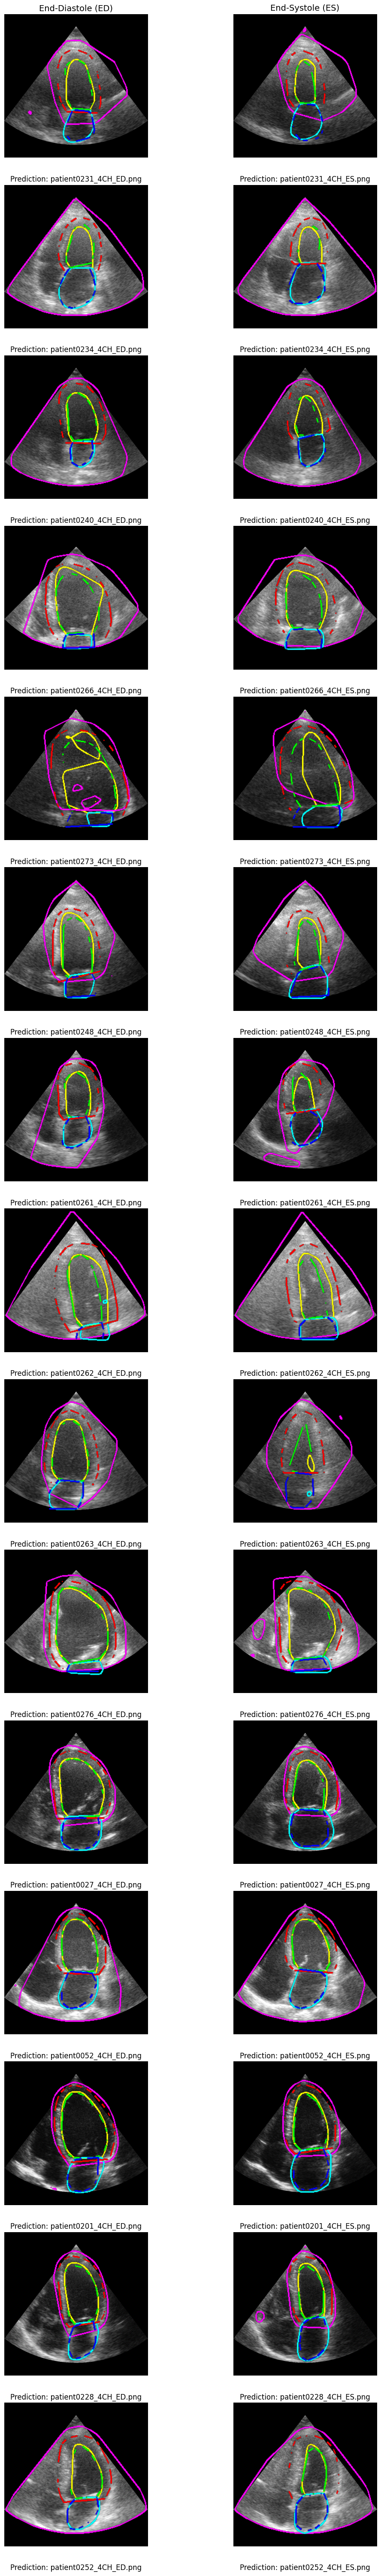

In [ ]:
########################################
# Visualization of Predictions         #
########################################
import matplotlib.pyplot as plt
import numpy as np
import cv2
import torch
import os

# Updated colormap for predictions
pred_colors = {
    1: (255, 255, 0),  # Class 1 (yellow)
    2: (255, 0, 255),  # Class 2 (magenta)
    3: (0, 255, 255)   # Class 3 (cyan)
}

# Original colormap for ground truth
gt_colors = {
    1: (0, 255, 0),    # Class 1 (green)
    2: (255, 0, 0),    # Class 2 (red)
    3: (0, 0, 255)     # Class 3 (blue)
}

def create_solid_contours(mask, class_colors, thickness=2, alpha=1):
    """Create solid contours for predictions."""
    mask_solid = np.zeros((*mask.shape, 4), dtype=np.uint8)

    for c, color in class_colors.items():
        binary_mask = (mask == c).astype(np.uint8)
        contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        convex_contours = [cv2.convexHull(cnt) for cnt in contours]
        cv2.drawContours(mask_solid, convex_contours, -1, (*color, int(255 * alpha)), thickness=thickness)

    return mask_solid

def create_hashed_overlay(mask, class_colors, thickness=2, dash_length=2, gap_length=7, alpha=1):
    """Creates a uniform hashed pattern overlay with consistent spacing."""
    mask_hashed = np.zeros((*mask.shape, 4), dtype=np.uint8)

    for c, color in class_colors.items():
        binary_mask = (mask == c).astype(np.uint8)
        # Create a slightly smaller mask to prevent overlap with solid lines
        kernel = np.ones((3,3), np.uint8)
        eroded_mask = cv2.erode(binary_mask, kernel, iterations=1)
        contours, _ = cv2.findContours(eroded_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        convex_contours = [cv2.convexHull(cnt) for cnt in contours]

        for cnt in convex_contours:
            perimeter = cv2.arcLength(cnt, True)
            num_points = int(perimeter / (dash_length + gap_length))
            if num_points < 2:
                continue

            resampled_points = []
            for i in range(num_points):
                dist = (i * perimeter) / num_points
                point = cv2.arcLength(cnt[:int((i/num_points)*len(cnt))], False)
                idx = 0
                curr_dist = 0
                while curr_dist < dist and idx < len(cnt)-1:
                    curr_dist += np.linalg.norm(cnt[idx+1][0] - cnt[idx][0])
                    idx += 1
                resampled_points.append(cnt[idx][0])

            for i in range(0, len(resampled_points)-1, 2):
                pt1 = tuple(resampled_points[i])
                pt2 = tuple(resampled_points[i+1])
                cv2.line(mask_hashed, pt1, pt2, (*color, int(255 * alpha)), thickness)

    return mask_hashed

# Manually specify test images
test_images = [
    "patient0231_4CH_ED.png", "patient0231_4CH_ES.png", # poor
    "patient0234_4CH_ED.png", "patient0234_4CH_ES.png", # poor
    "patient0240_4CH_ED.png", "patient0240_4CH_ES.png", # poor
    "patient0266_4CH_ED.png", "patient0266_4CH_ES.png", # poor
    "patient0273_4CH_ED.png", "patient0273_4CH_ES.png", # poor
    "patient0248_4CH_ED.png", "patient0248_4CH_ES.png", # medium
    "patient0261_4CH_ED.png", "patient0261_4CH_ES.png", # medium
    "patient0262_4CH_ED.png", "patient0262_4CH_ES.png", # medium
    "patient0263_4CH_ED.png", "patient0263_4CH_ES.png", # medium
    "patient0276_4CH_ED.png", "patient0276_4CH_ES.png", # medium
    "patient0027_4CH_ED.png", "patient0027_4CH_ES.png", # good
    "patient0052_4CH_ED.png", "patient0052_4CH_ES.png", # good
    "patient0201_4CH_ED.png", "patient0201_4CH_ES.png", # good
    "patient0228_4CH_ED.png", "patient0228_4CH_ES.png", # good
    "patient0252_4CH_ED.png", "patient0252_4CH_ES.png"  # good but defined in the paper as medium
]

# Separate ED and ES images
ed_images = [img for img in test_images if "_ED" in img]
es_images = [img for img in test_images if "_ES" in img]

# Set up subplots: One column for ED and another for ES
num_rows = max(len(ed_images), len(es_images))
fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, num_rows * 4))

model.eval()  # Ensure model is in evaluation mode

for row in range(num_rows):
    for col, image_list in enumerate([ed_images, es_images]):
        if row >= len(image_list):
            axs[row, col].axis("off")
            continue

        img_filename = image_list[row]
        img_path = os.path.join(test_images_path, img_filename)

        # Load and process image
        original_image = cv2.imread(img_path)
        original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

        # Get model prediction
        idx = test_dataset.images.index(img_filename)
        image, mask, _ = test_dataset[idx]
        image_batch = image.unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(image_batch)
            pred = torch.argmax(output, dim=1).squeeze(0).cpu().numpy()

        # Create edge overlays
        pred_solid = create_solid_contours(pred, pred_colors)
        gt_hashed = create_hashed_overlay(mask.cpu().numpy(), gt_colors)

        # Resize masks to match original image
        pred_solid = cv2.resize(pred_solid, (original_image.shape[1], original_image.shape[0]))
        gt_hashed = cv2.resize(gt_hashed, (original_image.shape[1], original_image.shape[0]))

        # Convert original image to RGBA
        result = cv2.cvtColor(original_image, cv2.COLOR_RGB2BGRA)

        # Layer the edges: first predictions (solid), then ground truth (dashed)
        for overlay in [pred_solid, gt_hashed]:
            alpha = overlay[:, :, 3:4].astype(float) / 255
            result = (overlay[:, :, :3] * alpha + result[:, :, :3] * (1 - alpha)).astype(np.uint8)

        # Display result
        axs[row, col].imshow(result)
        axs[row, col].text(
            0.5, -0.15, f"Prediction: {img_filename}", fontsize=12, ha='center', va='center', transform=axs[row, col].transAxes
        )
        axs[row, col].axis("off")

# Add column titles
axs[0, 0].set_title("End-Diastole (ED)", fontsize=14)
axs[0, 1].set_title("End-Systole (ES)", fontsize=14)

plt.tight_layout()
plt.show()

# Draft

## General functions


In [ ]:
# Function to compute ASSD for a single class
def compute_assd(pred, target):
    pred_boundary = pred - binary_erosion(pred).astype(float)
    target_boundary = target - binary_erosion(target).astype(float)

    pred_points = np.argwhere(pred_boundary > 0)
    target_points = np.argwhere(target_boundary > 0)

    if len(pred_points) == 0 or len(target_points) == 0:
        return 0  # ASSD is undefined if one of the masks is empty

    distances_pred_to_target = cdist(pred_points, target_points)
    distances_target_to_pred = cdist(target_points, pred_points)

    assd = (np.mean(np.min(distances_pred_to_target, axis=1)) +
            np.mean(np.min(distances_target_to_pred, axis=1))) / 2.0
    return assd

# Function to compute Dice coefficient
def compute_dice(pred, target):
    intersection = (pred * target).sum()
    dice = (2.0 * intersection) / (pred.sum() + target.sum() + 1e-6)
    return dice

# Function to compute IoU (Intersection over Union)
def compute_iou(pred, target):
    intersection = (pred * target).sum()
    union = (pred + target).clip(0, 1).sum()
    iou = intersection / (union + 1e-6)
    return iou

# Function to compute Hausdorff Distance (HD)
def compute_hd(pred, target):
    pred_boundary = pred - binary_erosion(pred).astype(float)
    target_boundary = target - binary_erosion(target).astype(float)

    pred_points = np.argwhere(pred_boundary > 0)
    target_points = np.argwhere(target_boundary > 0)

    if len(pred_points) == 0 or len(target_points) == 0:
        return 0  # HD is undefined if one of the masks is empty

    distances_pred_to_target = cdist(pred_points, target_points)
    distances_target_to_pred = cdist(target_points, pred_points)

    hd_pred_to_target = np.max(np.min(distances_pred_to_target, axis=1))  # max of min distances
    hd_target_to_pred = np.max(np.min(distances_target_to_pred, axis=1))  # max of min distances

    hd = max(hd_pred_to_target, hd_target_to_pred)
    return hd

# Function to compute F1 score
def compute_f1(pred, target):
    tp = (pred * target).sum()  # True positives
    fp = ((pred == 1) & (target == 0)).sum()  # False positives
    fn = ((pred == 0) & (target == 1)).sum()  # False negatives

    if tp + fp + fn == 0:  # Avoid division by zero
        return 0.0

    precision = tp / (tp + fp + 1e-6)
    recall = tp / (tp + fn + 1e-6)
    f1 = 2 * (precision * recall) / (precision + recall + 1e-6)
    return f1

## Simple Average Approach


### Test on the whole images


In [ ]:
import numpy as np
from scipy.ndimage import binary_erosion
from scipy.spatial.distance import cdist
from tabulate import tabulate

NUM_CLASSES = 4

# Load the best model weights
model.load_state_dict(torch.load(os.path.join(model_path, "best_model.pth"), map_location=device))
model.eval()

###################################################################
# Overall & Per Class Evaluation with dice, IOU, ASSD, HD, and F1 #
###################################################################
iou_per_class = [0.0] * (NUM_CLASSES)
dice_per_class = [0.0] * (NUM_CLASSES)
assd_per_class = [0.0] * (NUM_CLASSES)
hd_per_class = [0.0] * (NUM_CLASSES)
f1_per_class = [0.0] * (NUM_CLASSES)
num_samples = 0

# Initialize accumulators for overall metrics
overall_iou = 0.0
overall_dice = 0.0
overall_assd = 0.0
overall_hd = 0.0
overall_f1 = 0.0

# For loss
num_batches = 0
test_loss = 0.0

with torch.no_grad():
    for images, masks,_ in test_loader:
        images, masks = images.to(device), masks.to(device)
        outputs = model(images)

        loss = criterion(outputs, masks)
        test_loss += loss.item()

        preds = torch.argmax(outputs, dim=1)

        batch_iou = 0.0
        batch_dice = 0.0
        batch_assd = 0.0
        batch_hd = 0.0
        batch_f1 = 0.0

        for i in range(images.size(0)):
            iou_scores = []
            dice_scores = []
            assd_scores = []
            hd_scores = []
            f1_scores = []
            for c in range(1, NUM_CLASSES):  # Exclude background class
                pred_c = (preds[i] == c).float().cpu().numpy()
                target_c = (masks[i] == c).float().cpu().numpy()

                # IoU and Dice
                iou_value = compute_iou(pred_c, target_c)
                iou_scores.append(iou_value)
                iou_per_class[c] += iou_value

                dice_value = compute_dice(pred_c, target_c)
                dice_scores.append(dice_value)
                dice_per_class[c] += dice_value

                # ASSD
                assd_value = compute_assd(pred_c, target_c)
                assd_scores.append(assd_value)
                if assd_value is not None:
                    assd_per_class[c] += assd_value

                # Hausdorff Distance (HD)
                hd_value = compute_hd(pred_c, target_c)
                hd_scores.append(hd_value)
                if hd_value is not None:
                    hd_per_class[c] += hd_value

                # F1 Score
                f1_value = compute_f1(pred_c, target_c)
                f1_scores.append(f1_value)
                f1_per_class[c] += f1_value


            # Compute overall IoU and Dice for this image (excluding background)
            batch_iou += sum(iou_scores) / (NUM_CLASSES - 1)  # Exclude background class
            batch_dice += sum(dice_scores) / (NUM_CLASSES - 1)  # Exclude background class
            batch_assd += sum(assd_scores) / (NUM_CLASSES - 1)  # Exclude background class
            batch_hd += sum(hd_scores) / (NUM_CLASSES - 1)  # Exclude background class
            batch_f1 += sum(f1_scores) / (NUM_CLASSES - 1)  # Exclude background class

            num_samples += 1

        batch_iou /= images.size(0)
        batch_dice /= images.size(0)
        batch_assd /= images.size(0)
        batch_hd /= images.size(0)
        batch_f1 /= images.size(0)

        overall_iou += batch_iou
        overall_dice += batch_dice
        overall_assd += batch_assd
        overall_hd += batch_hd
        overall_f1 += batch_f1
        num_batches += 1

# Compute loss
test_loss /= num_batches

# Compute Overall
overall_iou /= num_batches
overall_dice /= num_batches
overall_assd /= num_batches
overall_hd /= num_batches
overall_f1 /= num_batches

# Normalize metrics per class
iou_per_class = [iou / num_samples for iou in iou_per_class]
dice_per_class = [dice / num_samples for dice in dice_per_class]
assd_per_class = [assd / num_samples for assd in assd_per_class]
hd_per_class = [hd / num_samples for hd in hd_per_class]
f1_per_class = [f1 / num_samples for f1 in f1_per_class]


print("\nTest Results:")
print(f"Test Loss: {test_loss:.4f}\n")

# Define class names
class_names = ["Left Ventricle", "Myocardium", "Left Atrium"]

# Prepare results for overall evaluation and per-class evaluation
overall_results = [
    ["Overall", f"{overall_dice:.3f}", f"{overall_iou:.3f}", f"{overall_assd:.2f}", f"{overall_hd:.1f}", f"{overall_f1:.3f}"]
]

per_class_results = []
for c in range(1, NUM_CLASSES):  # Exclude background class
    per_class_results.append([class_names[c-1],  # Use class names instead of "Class 1", "Class 2", etc.
                              f"{dice_per_class[c]:.3f}",
                              f"{iou_per_class[c]:.3f}",
                              f"{assd_per_class[c]:.2f}",
                              f"{hd_per_class[c]:.1f}",
                              f"{f1_per_class[c]:.3f}"])

# Combine overall and per-class results into one table
combined_results = [
    ["Overall", f"{overall_dice:.3f}", f"{overall_iou:.3f}", f"{overall_assd:.2f}", f"{overall_hd:.1f}", f"{overall_f1:.3f}"]
] + per_class_results

# Table headers
headers = ["Class", "Dice", "IoU", "ASSD", "Hausdorff", "F1 Score"]

# Print the combined table with specific formats for each column
print(tabulate(combined_results, headers=headers, tablefmt="grid", floatfmt=(".3f", ".3f", ".3f", ".2f", ".1f", ".3f")))

<ipython-input-24-93f3761cce8d>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(model_path, "best_model.pth"), map_location=de


Test Results:
Test Loss: 0.1591

+----------------+--------+-------+--------+-------------+------------+
| Class          |   Dice |   IoU |   ASSD |   Hausdorff |   F1 Score |
+================+========+=======+========+=============+============+
| Overall        |  0.921 | 0.856 |   1.92 |        47.3 |      0.921 |
+----------------+--------+-------+--------+-------------+------------+
| Left Ventricle |  0.947 | 0.900 |   1.68 |         5.4 |      0.947 |
+----------------+--------+-------+--------+-------------+------------+
| Myocardium     |  0.890 | 0.804 |   2.17 |       132.6 |      0.890 |
+----------------+--------+-------+--------+-------------+------------+
| Left Atrium    |  0.927 | 0.867 |   1.89 |         5.9 |      0.927 |
+----------------+--------+-------+--------+-------------+------------+


### Test on ED & ES images separatly


In [ ]:
import numpy as np
from scipy.ndimage import binary_erosion
from scipy.spatial.distance import cdist
from tabulate import tabulate

NUM_CLASSES = 4

# Load the best model weights
model.load_state_dict(torch.load(os.path.join(model_path, "best_model.pth"), map_location=device))
model.eval()

###################################################################
# Overall & Per Class Evaluation with dice, IOU, ASSD, HD, and F1 #
###################################################################
# Function to evaluate a specific DataLoader
def evaluate(loader, loader_name):
    print(f"Evaluating {loader_name} frames...\n")

    iou_per_class = [0.0] * (NUM_CLASSES)
    dice_per_class = [0.0] * (NUM_CLASSES)
    assd_per_class = [0.0] * (NUM_CLASSES)
    hd_per_class = [0.0] * (NUM_CLASSES)
    f1_per_class = [0.0] * (NUM_CLASSES)
    num_samples = 0

    # Initialize accumulators for overall metrics
    overall_iou = 0.0
    overall_dice = 0.0
    overall_assd = 0.0
    overall_hd = 0.0
    overall_f1 = 0.0

    # For loss
    num_batches = 0
    test_loss = 0.0

    with torch.no_grad():
        for images, masks  in loader:
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)

            loss = criterion(outputs, masks)
            test_loss += loss.item()

            preds = torch.argmax(outputs, dim=1)

            batch_iou = 0.0
            batch_dice = 0.0
            batch_assd = 0.0
            batch_hd = 0.0
            batch_f1 = 0.0

            for i in range(images.size(0)):
                iou_scores = []
                dice_scores = []
                assd_scores = []
                hd_scores = []
                f1_scores = []
                for c in range(1, NUM_CLASSES):  # Exclude background class
                    pred_c = (preds[i] == c).float().cpu().numpy()
                    target_c = (masks[i] == c).float().cpu().numpy()

                    # IoU and Dice
                    iou_value = compute_iou(pred_c, target_c)
                    iou_scores.append(iou_value)
                    iou_per_class[c] += iou_value

                    dice_value = compute_dice(pred_c, target_c)
                    dice_scores.append(dice_value)
                    dice_per_class[c] += dice_value

                    # ASSD
                    assd_value = compute_assd(pred_c, target_c)
                    assd_scores.append(assd_value)
                    if assd_value is not None:
                        assd_per_class[c] += assd_value

                    # Hausdorff Distance (HD)
                    hd_value = compute_hd(pred_c, target_c)
                    hd_scores.append(hd_value)
                    if hd_value is not None:
                        hd_per_class[c] += hd_value

                    # F1 Score
                    f1_value = compute_f1(pred_c, target_c)
                    f1_scores.append(f1_value)
                    f1_per_class[c] += f1_value


                # Compute overall IoU and Dice for this image (excluding background)
                batch_iou += sum(iou_scores) / (NUM_CLASSES - 1)  # Exclude background class
                batch_dice += sum(dice_scores) / (NUM_CLASSES - 1)  # Exclude background class
                batch_assd += sum(assd_scores) / (NUM_CLASSES - 1)  # Exclude background class
                batch_hd += sum(hd_scores) / (NUM_CLASSES - 1)  # Exclude background class
                batch_f1 += sum(f1_scores) / (NUM_CLASSES - 1)  # Exclude background class

                num_samples += 1

            batch_iou /= images.size(0)
            batch_dice /= images.size(0)
            batch_assd /= images.size(0)
            batch_hd /= images.size(0)
            batch_f1 /= images.size(0)

            overall_iou += batch_iou
            overall_dice += batch_dice
            overall_assd += batch_assd
            overall_hd += batch_hd
            overall_f1 += batch_f1
            num_batches += 1

    # Compute loss
    test_loss /= num_batches

    # Compute Overall
    overall_iou /= num_batches
    overall_dice /= num_batches
    overall_assd /= num_batches
    overall_hd /= num_batches
    overall_f1 /= num_batches

    # Normalize metrics per class
    iou_per_class = [iou / num_samples for iou in iou_per_class]
    dice_per_class = [dice / num_samples for dice in dice_per_class]
    assd_per_class = [assd / num_samples for assd in assd_per_class]
    hd_per_class = [hd / num_samples for hd in hd_per_class]
    f1_per_class = [f1 / num_samples for f1 in f1_per_class]


    print("\nTest Results:")
    print(f"Test Loss: {test_loss:.4f}\n")

    # Define class names
    class_names = ["Left Ventricle", "Myocardium", "Left Atrium"]

    # Prepare results for overall evaluation and per-class evaluation
    overall_results = [
        ["Overall", f"{overall_dice:.3f}", f"{overall_iou:.3f}", f"{overall_assd:.2f}", f"{overall_hd:.1f}", f"{overall_f1:.3f}"]
    ]

    per_class_results = []
    for c in range(1, NUM_CLASSES):  # Exclude background class
        per_class_results.append([class_names[c-1],  # Use class names instead of "Class 1", "Class 2", etc.
                                f"{dice_per_class[c]:.3f}",
                                f"{iou_per_class[c]:.3f}",
                                f"{assd_per_class[c]:.2f}",
                                f"{hd_per_class[c]:.1f}",
                                f"{f1_per_class[c]:.3f}"])

    # Combine overall and per-class results into one table
    combined_results = [
        ["Overall", f"{overall_dice:.3f}", f"{overall_iou:.3f}", f"{overall_assd:.2f}", f"{overall_hd:.1f}", f"{overall_f1:.3f}"]
    ] + per_class_results

    # Table headers
    headers = ["Class", "Dice", "IoU", "ASSD", "Hausdorff", "F1 Score"]

    # Print the combined table with specific formats for each column
    print(tabulate(combined_results, headers=headers, tablefmt="grid", floatfmt=(".3f", ".3f", ".3f", ".2f", ".1f", ".3f")))

# Evaluate ED and ES frames separately
evaluate(ed_loader, "ED")
evaluate(es_loader, "ES")

<ipython-input-25-8b13540edad7>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(model_path, "best_model.pth"), map_location=de

Evaluating ED frames...


Test Results:
Test Loss: 0.1617

+----------------+--------+-------+--------+-------------+------------+
| Class          |   Dice |   IoU |   ASSD |   Hausdorff |   F1 Score |
+================+========+=======+========+=============+============+
| Overall        |  0.919 | 0.853 |   1.92 |        47.1 |      0.919 |
+----------------+--------+-------+--------+-------------+------------+
| Left Ventricle |  0.955 | 0.914 |   1.68 |         5.6 |      0.955 |
+----------------+--------+-------+--------+-------------+------------+
| Myocardium     |  0.887 | 0.798 |   2.09 |       129.4 |      0.887 |
+----------------+--------+-------+--------+-------------+------------+
| Left Atrium    |  0.915 | 0.848 |   2.00 |         6.3 |      0.915 |
+----------------+--------+-------+--------+-------------+------------+
Evaluating ES frames...


Test Results:
Test Loss: 0.1542

+----------------+--------+-------+--------+-------------+------------+
| Class          |

## Weighted Average Approach

### Test on the whole images


In [ ]:
import numpy as np
from scipy.ndimage import binary_erosion
from scipy.spatial.distance import cdist
from tabulate import tabulate

NUM_CLASSES = 4

# Load the best model weights
model.load_state_dict(torch.load(os.path.join(model_path, "best_model.pth"), map_location=device))
model.eval()

###################################################################
# Overall & Per Class Evaluation with dice, IOU, ASSD, HD, and F1 #
###################################################################
iou_per_class = [0.0] * (NUM_CLASSES)
dice_per_class = [0.0] * (NUM_CLASSES)
assd_per_class = [0.0] * (NUM_CLASSES)
hd_per_class = [0.0] * (NUM_CLASSES)
f1_per_class = [0.0] * (NUM_CLASSES)
num_samples = 0

# Initialize accumulators for overall metrics
overall_iou = 0.0
overall_dice = 0.0
overall_assd = 0.0
overall_hd = 0.0
overall_f1 = 0.0
class_weights = [0.0] * (NUM_CLASSES)  # To calculate class-specific weights

# For Test loss
num_batches = 0
test_loss = 0.0

with torch.no_grad():
    for images, masks,_ in test_loader:
        images, masks = images.to(device), masks.to(device)
        outputs = model(images)

        loss = criterion(outputs, masks)
        test_loss += loss.item()

        preds = torch.argmax(outputs, dim=1)

        for i in range(images.size(0)):
            for c in range(1, NUM_CLASSES):  # Exclude background class
                pred_c = (preds[i] == c).float().cpu().numpy()
                target_c = (masks[i] == c).float().cpu().numpy()

                # IoU and Dice
                iou_value = compute_iou(pred_c, target_c)
                iou_per_class[c] += iou_value

                dice_value = compute_dice(pred_c, target_c)
                dice_per_class[c] += dice_value

                # ASSD
                assd_value = compute_assd(pred_c, target_c)
                if assd_value is not None:
                    assd_per_class[c] += assd_value

                # Hausdorff Distance (HD)
                hd_value = compute_hd(pred_c, target_c)
                if hd_value is not None:
                    hd_per_class[c] += hd_value

                # F1 Score
                f1_value = compute_f1(pred_c, target_c)
                f1_per_class[c] += f1_value

                # Update weights for overall metrics
                class_weight = target_c.sum()  # Total pixels in the ground truth for class c
                class_weights[c] += class_weight
                overall_iou += (iou_value) * class_weight
                overall_dice += (dice_value) * class_weight
                if assd_value is not None:
                    overall_assd += assd_value * class_weight
                if hd_value is not None:
                    overall_hd += hd_value * class_weight
                overall_f1 += f1_value * class_weight

            num_samples += 1

        num_batches += 1

# Compute loss
test_loss /= num_batches

# Normalize metrics per class
iou_per_class = [iou / num_samples for iou in iou_per_class]
dice_per_class = [dice / num_samples for dice in dice_per_class]
assd_per_class = [assd / num_samples for assd in assd_per_class]
hd_per_class = [hd / num_samples for hd in hd_per_class]
f1_per_class = [f1 / num_samples for f1 in f1_per_class]

# Compute overall metrics by weighted average
total_weight = sum(class_weights[1:])  # Exclude background class weight
overall_iou /= total_weight
overall_dice /= total_weight
overall_assd /= total_weight
overall_hd /= total_weight
overall_f1 /= total_weight


print("\nTest Results:")
print(f"Test Loss: {test_loss:.4f}\n")

# Define class names
class_names = ["Left Ventricle", "Myocardium", "Left Atrium"]

# Prepare results for overall evaluation and per-class evaluation
overall_results = [
    ["Overall", f"{overall_dice:.3f}", f"{overall_iou:.3f}", f"{overall_assd:.2f}", f"{overall_hd:.1f}", f"{overall_f1:.3f}"]
]

per_class_results = []
for c in range(1, NUM_CLASSES):  # Exclude background class
    per_class_results.append([class_names[c-1],  # Use class names instead of "Class 1", "Class 2", etc.
                              f"{dice_per_class[c]:.3f}",
                              f"{iou_per_class[c]:.3f}",
                              f"{assd_per_class[c]:.2f}",
                              f"{hd_per_class[c]:.1f}",
                              f"{f1_per_class[c]:.3f}"])

# Combine overall and per-class results into one table
combined_results = [
    ["Overall", f"{overall_dice:.3f}", f"{overall_iou:.3f}", f"{overall_assd:.2f}", f"{overall_hd:.1f}", f"{overall_f1:.3f}"]
] + per_class_results

# Table headers
headers = ["Class", "Dice", "IoU", "ASSD", "Hausdorff", "F1 Score"]

# Print the combined table with specific formats for each column
print(tabulate(combined_results, headers=headers, tablefmt="grid", floatfmt=(".3f", ".3f", ".3f", ".2f", ".1f", ".3f")))

<ipython-input-26-8062ce294e85>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(model_path, "best_model.pth"), map_location=de


Test Results:
Test Loss: 0.1591

+----------------+--------+-------+--------+-------------+------------+
| Class          |   Dice |   IoU |   ASSD |   Hausdorff |   F1 Score |
+================+========+=======+========+=============+============+
| Overall        |  0.923 | 0.860 |   1.97 |        51.9 |      0.923 |
+----------------+--------+-------+--------+-------------+------------+
| Left Ventricle |  0.947 | 0.900 |   1.68 |         5.4 |      0.947 |
+----------------+--------+-------+--------+-------------+------------+
| Myocardium     |  0.890 | 0.804 |   2.17 |       132.6 |      0.890 |
+----------------+--------+-------+--------+-------------+------------+
| Left Atrium    |  0.927 | 0.867 |   1.89 |         5.9 |      0.927 |
+----------------+--------+-------+--------+-------------+------------+


### Test on ED & ES images separatly


In [ ]:
import numpy as np
from scipy.ndimage import binary_erosion
from scipy.spatial.distance import cdist
from tabulate import tabulate

NUM_CLASSES = 4

# Load the best model weights
model.load_state_dict(torch.load(os.path.join(model_path, "best_model.pth"), map_location=device))
model.eval()

###################################################################
# Overall & Per Class Evaluation with dice, IOU, ASSD, HD, and F1 #
###################################################################

# Function to evaluate a specific DataLoader
def evaluate(loader, loader_name):
    print(f"Evaluating {loader_name} frames...\n")
    iou_per_class = [0.0] * (NUM_CLASSES)
    dice_per_class = [0.0] * (NUM_CLASSES)
    assd_per_class = [0.0] * (NUM_CLASSES)
    hd_per_class = [0.0] * (NUM_CLASSES)
    f1_per_class = [0.0] * (NUM_CLASSES)
    num_samples = 0

    # Initialize accumulators for overall metrics
    overall_iou = 0.0
    overall_dice = 0.0
    overall_assd = 0.0
    overall_hd = 0.0
    overall_f1 = 0.0
    class_weights = [0.0] * (NUM_CLASSES)  # To calculate class-specific weights

    # For Test loss
    num_batches = 0
    test_loss = 0.0

    with torch.no_grad():
        for images, masks in loader:
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)

            loss = criterion(outputs, masks)
            test_loss += loss.item()

            preds = torch.argmax(outputs, dim=1)

            for i in range(images.size(0)):
                for c in range(1, NUM_CLASSES):  # Exclude background class
                    pred_c = (preds[i] == c).float().cpu().numpy()
                    target_c = (masks[i] == c).float().cpu().numpy()

                    # IoU and Dice
                    iou_value = compute_iou(pred_c, target_c)
                    iou_per_class[c] += iou_value

                    dice_value = compute_dice(pred_c, target_c)
                    dice_per_class[c] += dice_value

                    # ASSD
                    assd_value = compute_assd(pred_c, target_c)
                    if assd_value is not None:
                        assd_per_class[c] += assd_value

                    # Hausdorff Distance (HD)
                    hd_value = compute_hd(pred_c, target_c)
                    if hd_value is not None:
                        hd_per_class[c] += hd_value

                    # F1 Score
                    f1_value = compute_f1(pred_c, target_c)
                    f1_per_class[c] += f1_value

                    # Update weights for overall metrics
                    class_weight = target_c.sum()  # Total pixels in the ground truth for class c
                    class_weights[c] += class_weight
                    overall_iou += (iou_value) * class_weight
                    overall_dice += (dice_value) * class_weight
                    if assd_value is not None:
                        overall_assd += assd_value * class_weight
                    if hd_value is not None:
                        overall_hd += hd_value * class_weight
                    overall_f1 += f1_value * class_weight

                num_samples += 1

            num_batches += 1

    # Compute loss
    test_loss /= num_batches

    # Normalize metrics per class
    iou_per_class = [iou / num_samples for iou in iou_per_class]
    dice_per_class = [dice / num_samples for dice in dice_per_class]
    assd_per_class = [assd / num_samples for assd in assd_per_class]
    hd_per_class = [hd / num_samples for hd in hd_per_class]
    f1_per_class = [f1 / num_samples for f1 in f1_per_class]

    # Compute overall metrics by weighted average
    total_weight = sum(class_weights[1:])  # Exclude background class weight
    overall_iou /= total_weight
    overall_dice /= total_weight
    overall_assd /= total_weight
    overall_hd /= total_weight
    overall_f1 /= total_weight


    print("\nTest Results:")
    print(f"Test Loss: {test_loss:.4f}\n")

    # Define class names
    class_names = ["Left Ventricle", "Myocardium", "Left Atrium"]

    # Prepare results for overall evaluation and per-class evaluation
    overall_results = [
        ["Overall", f"{overall_dice:.3f}", f"{overall_iou:.3f}", f"{overall_assd:.2f}", f"{overall_hd:.1f}", f"{overall_f1:.3f}"]
    ]

    per_class_results = []
    for c in range(1, NUM_CLASSES):  # Exclude background class
        per_class_results.append([class_names[c-1],  # Use class names instead of "Class 1", "Class 2", etc.
                                f"{dice_per_class[c]:.3f}",
                                f"{iou_per_class[c]:.3f}",
                                f"{assd_per_class[c]:.2f}",
                                f"{hd_per_class[c]:.1f}",
                                f"{f1_per_class[c]:.3f}"])

    # Combine overall and per-class results into one table
    combined_results = [
        ["Overall", f"{overall_dice:.3f}", f"{overall_iou:.3f}", f"{overall_assd:.2f}", f"{overall_hd:.1f}", f"{overall_f1:.3f}"]
    ] + per_class_results

    # Table headers
    headers = ["Class", "Dice", "IoU", "ASSD", "Hausdorff", "F1 Score"]

    # Print the combined table with specific formats for each column
    print(tabulate(combined_results, headers=headers, tablefmt="grid", floatfmt=(".3f", ".3f", ".3f", ".2f", ".1f", ".3f")))

# Evaluate ED and ES frames separately
evaluate(ed_loader, "ED")
evaluate(es_loader, "ES")

<ipython-input-27-abcc296ae0f5>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(model_path, "best_model.pth"), map_location=de

Evaluating ED frames...


Test Results:
Test Loss: 0.1617

+----------------+--------+-------+--------+-------------+------------+
| Class          |   Dice |   IoU |   ASSD |   Hausdorff |   F1 Score |
+================+========+=======+========+=============+============+
| Overall        |  0.923 | 0.861 |   1.97 |        49.3 |      0.923 |
+----------------+--------+-------+--------+-------------+------------+
| Left Ventricle |  0.955 | 0.914 |   1.68 |         5.6 |      0.955 |
+----------------+--------+-------+--------+-------------+------------+
| Myocardium     |  0.887 | 0.798 |   2.09 |       129.4 |      0.887 |
+----------------+--------+-------+--------+-------------+------------+
| Left Atrium    |  0.915 | 0.848 |   2.00 |         6.3 |      0.915 |
+----------------+--------+-------+--------+-------------+------------+
Evaluating ES frames...


Test Results:
Test Loss: 0.1542

+----------------+--------+-------+--------+-------------+------------+
| Class          |